## EDA

In [1]:
import numpy as np
import pandas as pd 
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('comments.csv')
df2 = pd.read_csv('comments_final2.csv')
df_books = pd.read_csv('book_data.csv')

In [3]:
df1.head()

,product_id,comment_id,title,thank_count,customer_id,rating,comment
0,74021317,12559756,Cực kì hài lòng,313,22051463,5,"Có những người bước đến, họ lấp đầy hạnh phúc ..."
1,74021317,16979365,Cực kì hài lòng,6,27791831,5,"Thấy nhiều bạn chê tiki gói hàng quá, may sao ..."
2,74021317,14069617,Cực kì hài lòng,25,17748750,5,"Bìa cực xinh, tiki giao hàng nhanh, sách không..."
3,74021317,8569824,Cực kì hài lòng,57,410797,5,"Sách lúc nhận hình thức rất ổn, không cong vên..."
4,74021317,18368714,Cực kì hài lòng,0,28545286,5,Một cuốn sách rất đáng đọc về tình yêu thương ...


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141281 entries, 0 to 141280
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   product_id   141281 non-null  int64 
 1   comment_id   141281 non-null  int64 
 2   title        141277 non-null  object
 3   thank_count  141281 non-null  int64 
 4   customer_id  141281 non-null  int64 
 5   rating       141281 non-null  int64 
 6   comment      103263 non-null  object
dtypes: int64(5), object(2)
memory usage: 7.5+ MB


In [5]:
df1.describe()

,product_id,comment_id,thank_count,customer_id,rating
count,1.412810e+05,1.412810e+05,141281.000000,1.412810e+05,141281.000000
mean,9.302064e+07,1.391595e+07,0.902966,1.192041e+07,4.639513
std,6.516308e+07,4.574479e+06,6.151528,8.726579e+06,0.895394
min,3.353370e+05,1.161970e+05,0.000000,2.700000e+01,1.000000
25%,4.462753e+07,1.167244e+07,0.000000,5.280033e+06,5.000000
50%,7.790045e+07,1.557704e+07,0.000000,1.101454e+07,5.000000
75%,1.527431e+08,1.758605e+07,0.000000,1.904932e+07,5.000000
max,2.078530e+08,1.839260e+07,548.000000,2.857852e+07,5.000000


In [6]:
corr_matrix = df1.corr()
print(corr_matrix)

             product_id  comment_id  thank_count  customer_id    rating
product_id     1.000000    0.609231    -0.099810     0.117337  0.128042
comment_id     0.609231    1.000000    -0.206776     0.252598  0.172003
thank_count   -0.099810   -0.206776     1.000000    -0.064149 -0.060412
customer_id    0.117337    0.252598    -0.064149     1.000000  0.036464
rating         0.128042    0.172003    -0.060412     0.036464  1.000000


C:\Users\tinhdaubuoi\AppData\Local\Temp\ipykernel_21580\2610757592.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df1.corr()


In [7]:
grouped_data = df1.groupby('rating').mean()
print(grouped_data)

          product_id    comment_id  thank_count   customer_id
rating                                                       
1       7.135503e+07  1.195943e+07     2.677197  1.128462e+07
2       6.296448e+07  1.095105e+07     2.166235  1.038522e+07
3       6.847448e+07  1.150990e+07     1.488249  1.071674e+07
4       8.159221e+07  1.287065e+07     0.811892  1.166294e+07
5       9.713755e+07  1.430402e+07     0.787930  1.206918e+07


C:\Users\tinhdaubuoi\AppData\Local\Temp\ipykernel_21580\167905614.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df1.groupby('rating').mean()


Kết quả cho thấy, hầu hết những đánh giá được thích nhiều thường là đánh giá tiêu cực, điều này cho thấy </br>
người dùng có xu hướng tìm kiếm những đánh giá tiêu cực để có những đánh giá khách quan hơn về sản phẩm.

In [8]:
df1['text_count'] = df1['comment'].apply(lambda x: len(x.split()) if not pd.isna(x) else 0)


In [9]:
#rating to label (-1, 0, 1)
df1['label'] = df1['rating'].apply(lambda x: 1 if x > 3 else 0 if x == 3 else -1)

In [10]:
df1.head()

,product_id,comment_id,title,thank_count,customer_id,rating,comment,text_count,label
0,74021317,12559756,Cực kì hài lòng,313,22051463,5,"Có những người bước đến, họ lấp đầy hạnh phúc ...",220,1
1,74021317,16979365,Cực kì hài lòng,6,27791831,5,"Thấy nhiều bạn chê tiki gói hàng quá, may sao ...",61,1
2,74021317,14069617,Cực kì hài lòng,25,17748750,5,"Bìa cực xinh, tiki giao hàng nhanh, sách không...",204,1
3,74021317,8569824,Cực kì hài lòng,57,410797,5,"Sách lúc nhận hình thức rất ổn, không cong vên...",125,1
4,74021317,18368714,Cực kì hài lòng,0,28545286,5,Một cuốn sách rất đáng đọc về tình yêu thương ...,208,1


In [11]:
corr_matrix = df1[['text_count', 'rating', 'thank_count']].corr()
print(corr_matrix)

             text_count    rating  thank_count
text_count     1.000000 -0.143307     0.291823
rating        -0.143307  1.000000    -0.060412
thank_count    0.291823 -0.060412     1.000000


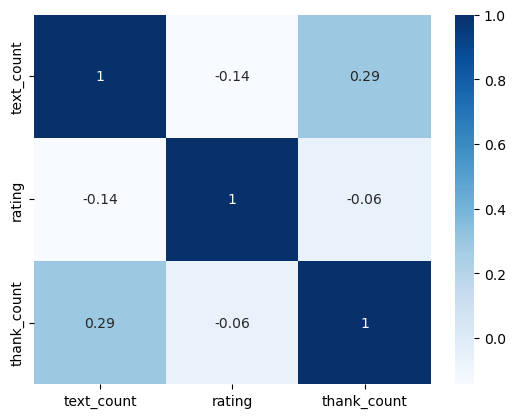

In [12]:
#corr plot
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

<Axes: xlabel='thank_count', ylabel='text_count'>

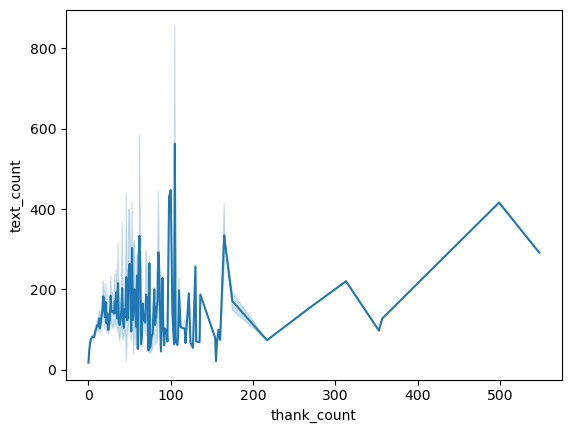

In [13]:
sns.lineplot(x='thank_count', y='text_count', data=df1)

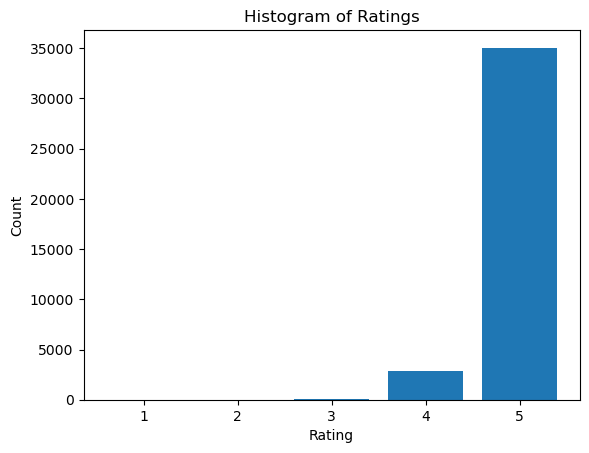

In [14]:
# Define the data
values = [35055, 2906, 45, 9, 3]
labels = [5, 4, 3, 2, 1]

# Create the histogram
plt.bar(labels, values)

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Histogram of Ratings')

# Show the plot
plt.show()

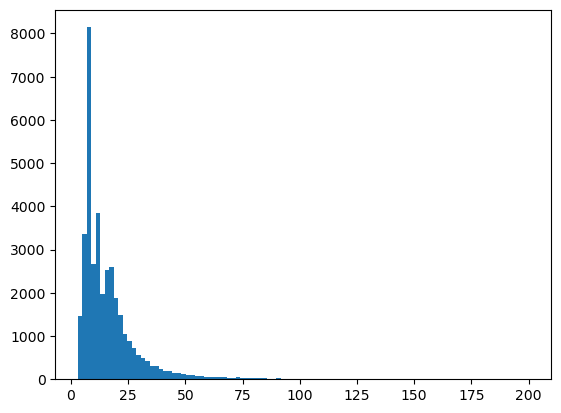

In [15]:
plt.hist(df2['word_count'], bins=100)
plt.show()

In [16]:
df2['word_count'].describe()

count    36932.000000
mean        16.460495
std         15.328011
min          3.000000
25%          7.000000
50%         11.000000
75%         20.000000
max        200.000000
Name: word_count, dtype: float64

In [17]:
df1['text_count'].describe()    

count    141281.000000
mean         26.187718
std          45.926484
min           0.000000
25%           0.000000
50%          13.000000
75%          33.000000
max        1221.000000
Name: text_count, dtype: float64

Tương tự với kết quả trên, từ bảng đo độ tương quan giữa các đặc trưng, ta thấy rằng có tương quan thuận cao giữa thank_count </br>
và text_count, điều này cho thấy những bình luận nhiều chữ nhận được nhiều thích hơn, điều này có thể là do những bình luận </br>
dài thường có nhiều thông tin hơn, dễ hiểu hơn, dễ đánh giá sản phẩm hơn.

- Với text_count và rating thì có tương quan nghịch, điều này cho thấy những bình luận dài thường có xu hướng đánh giá thấp hơn </br>
những bình luận ngắn. </br>
- Với rating và thank_count thì có tương quan nghịch nhẹ, điều này được phản ánh ở đánh giá trước đó về bộ dữ liệu, những đánh giá </br>
tiêu cực thường nhận được nhiều thích hơn những đánh giá tích cực.

(array([  4495.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,   2701.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,   5276.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,  14295.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

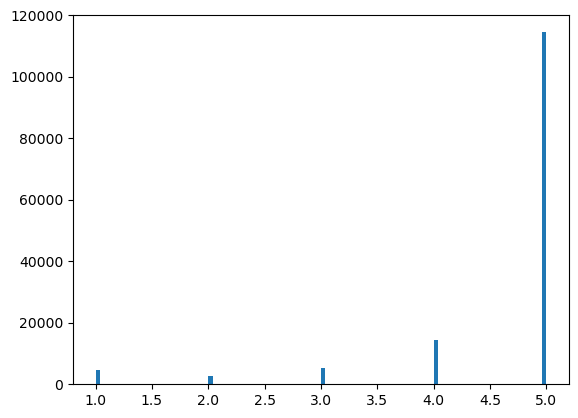

In [18]:
plt.hist(df1['rating'], bins=100)

=> Dữ liệu lệch nhiều về những đánh giá có rating cao, đặc biệt là rating = 5

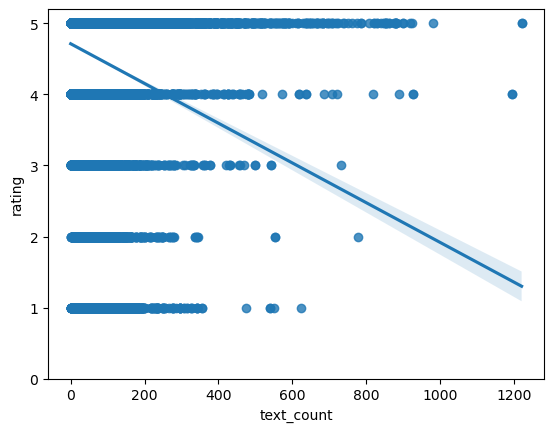

In [19]:
#create regression plot for rating and text_count, thank_count 
sns.regplot(x='text_count', y='rating', data=df1)
plt.ylim(0,)
plt.show()

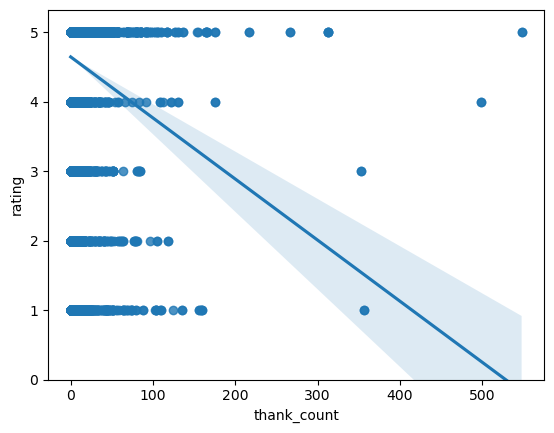

In [20]:
sns.regplot(x='thank_count', y='rating', data=df1)
plt.ylim(0,)
plt.show()

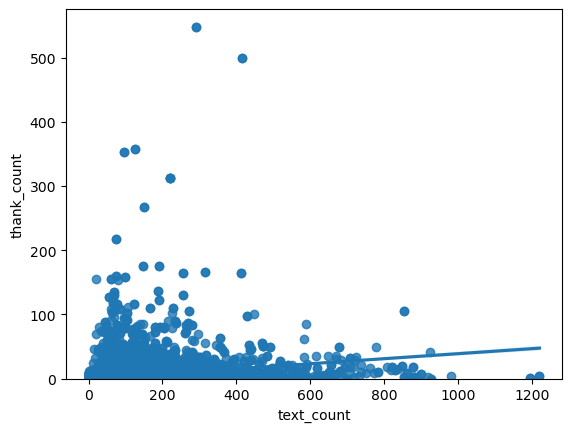

In [21]:
sns.regplot(x='text_count', y='thank_count', data=df1)
plt.ylim(0,)
plt.show()

<Axes: xlabel='text_count', ylabel='label'>

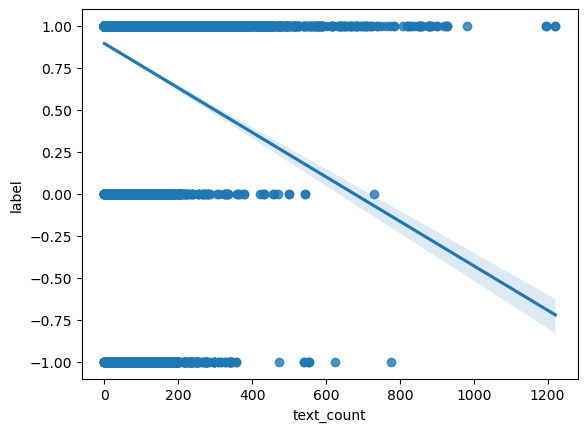

In [22]:
sns.regplot(x='text_count', y='label', data=df1)

<Axes: xlabel='thank_count', ylabel='label'>

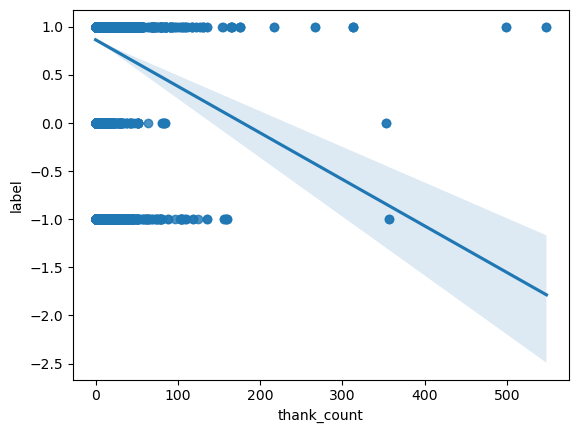

In [23]:
sns.regplot(x='thank_count', y='label', data=df1)

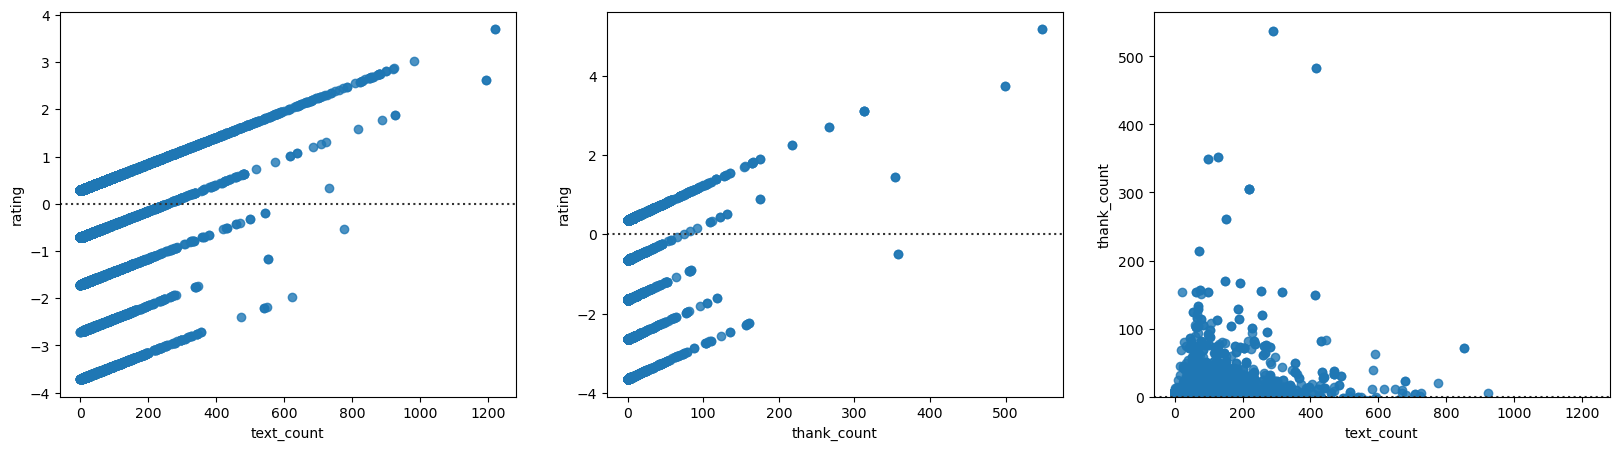

In [24]:
#residual plot with 3 with multiple plot in one figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
sns.residplot(x='text_count', y='rating', data=df1, ax=ax1)
sns.residplot(x='thank_count', y='rating', data=df1, ax=ax2)
sns.residplot(x='text_count', y='thank_count', data=df1, ax=ax3)
plt.ylim(0,)
plt.show()

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [26]:
X = df1[['text_count', 'thank_count']]
y = df1['rating']
# X is the independent variable and y is the dependent variable
models = [LinearRegression(), Ridge(), Lasso(), RandomForestRegressor(),
          GradientBoostingRegressor(), DecisionTreeRegressor(), KNeighborsRegressor()]

# Evaluate each model using cross-validation
for model in models:
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{type(model).__name__}: {scores.mean():.2f} (+/- {scores.std():.2f})")

LinearRegression: 0.02 (+/- 0.01)
Ridge: 0.02 (+/- 0.01)
Lasso: 0.02 (+/- 0.01)
RandomForestRegressor: 0.02 (+/- 0.02)
GradientBoostingRegressor: 0.07 (+/- 0.01)
DecisionTreeRegressor: -0.02 (+/- 0.03)
KNeighborsRegressor: -0.13 (+/- 0.03)


In [27]:
# Fit the regression models
X = df1[['text_count']]
X1 = df1[['thank_count']]
y = df1['rating']

In [28]:

model1 = LinearRegression().fit(X, y)
model2 = Ridge().fit(X, y)
model3 = Lasso().fit(X, y)
model5 = GradientBoostingRegressor().fit(X, y)
model6 = DecisionTreeRegressor().fit(X, y)

In [29]:
model4 = RandomForestRegressor(n_estimators=300).fit(X, y)
model4_sub = RandomForestRegressor(n_estimators=300).fit(X1, y )

c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


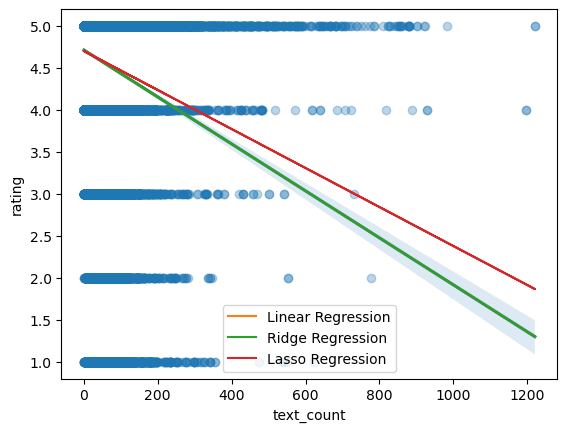

In [30]:
# Plot the scatter plot and regression lines
sns.regplot(x=X, y=y, scatter_kws={'alpha':0.3})
plt.plot(X, model1.predict(X.values.reshape(-1, 1)), label='Linear Regression')
plt.plot(X, model2.predict(X.values.reshape(-1, 1)), label='Ridge Regression')
plt.plot(X, model3.predict(X.values.reshape(-1, 1)), label='Lasso Regression')
plt.legend()
plt.show()

c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


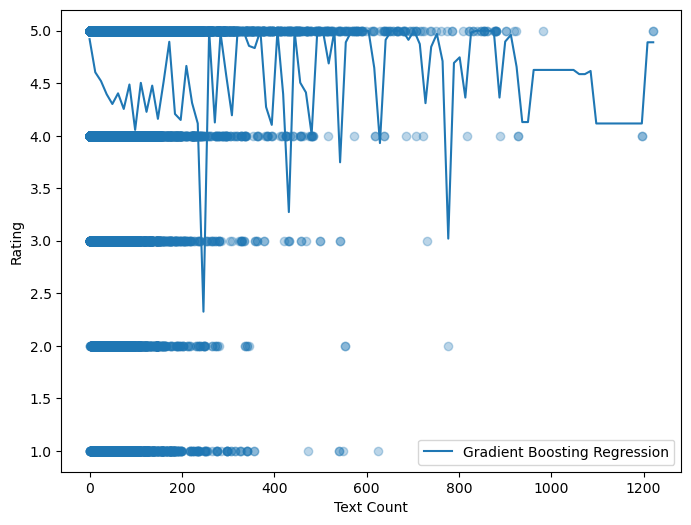

In [31]:
# Generate a range of X values
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Predict the corresponding y values for the X range
y_range = model4.predict(X_range)

# Plot the scatter plot and the smooth curve
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X, y, alpha=0.3)
ax.plot(X_range, y_range, label='Gradient Boosting Regression')
ax.legend()
ax.set_xlabel('Text Count')
ax.set_ylabel('Rating')
plt.show()

c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


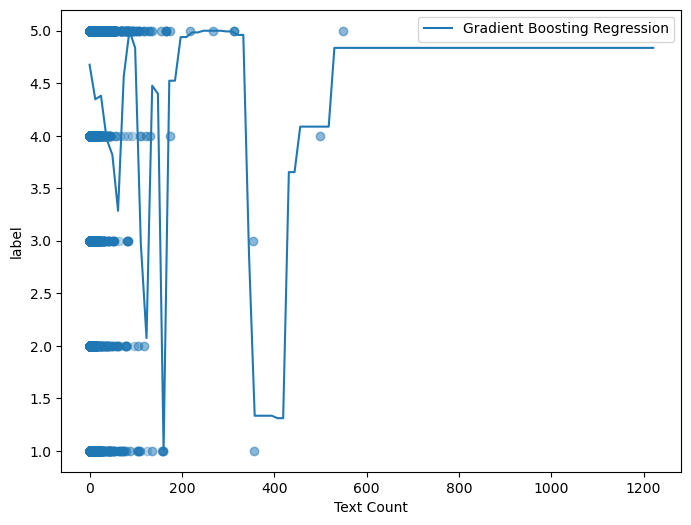

In [32]:
# Predict the corresponding y values for the X range
y_range1 = model4_sub.predict(X_range)

# Plot the scatter plot and the smooth curve
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X1, y, alpha=0.3)
ax.plot(X_range, y_range1, label='Gradient Boosting Regression')
ax.legend()
ax.set_xlabel('Text Count')
ax.set_ylabel('label')
plt.show()

c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


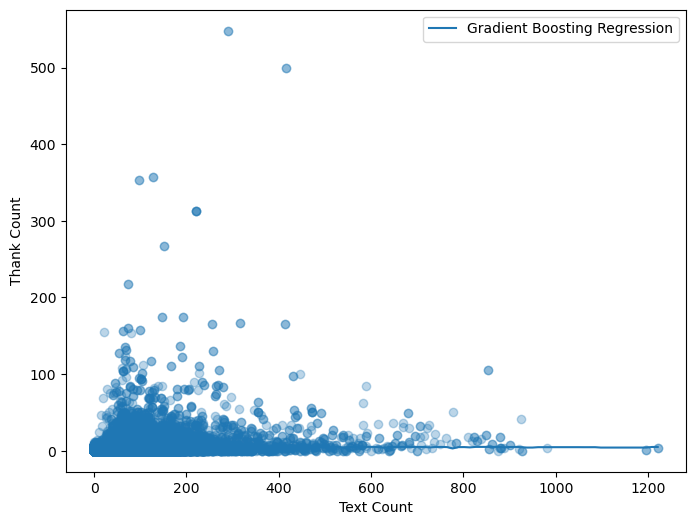

In [33]:
# Predict the corresponding y values for the X range
y_range1 = model5.predict(X_range)

# Plot the scatter plot and the smooth curve
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X, X1, alpha=0.3)
ax.plot(X_range, y_range, label='Gradient Boosting Regression')
ax.legend()
ax.set_xlabel('Text Count')
ax.set_ylabel('Thank Count')
#zoom in
plt.show()

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression()

c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


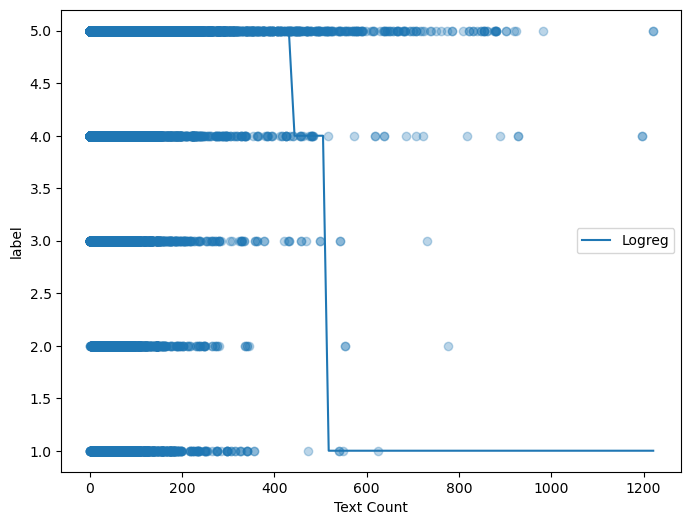

In [36]:
# Predict the corresponding y values for the X range
y_range1 = logreg.predict(X_range)

# Plot the scatter plot and the smooth curve
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X, y, alpha=0.3)
ax.plot(X_range, y_range1, label='Logreg')
ax.legend()
ax.set_xlabel('Text Count')
ax.set_ylabel('label')
#zoom in
plt.show()

In [37]:
logreg1 = LogisticRegression()
logreg1.fit(X1, y)

LogisticRegression()

c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


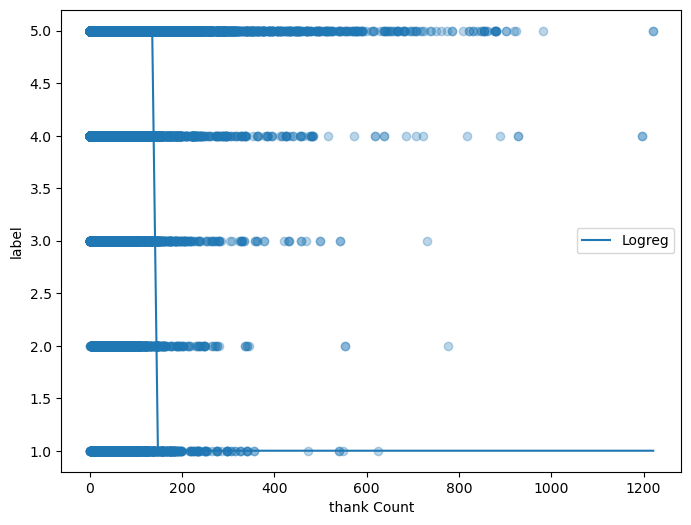

In [38]:
# Predict the corresponding y values for the X range
y_range1 = logreg1.predict(X_range)

# Plot the scatter plot and the smooth curve
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X, y, alpha=0.3)
ax.plot(X_range, y_range1, label='Logreg')
ax.legend()
ax.set_xlabel('thank Count')
ax.set_ylabel('label')
#zoom in
plt.show()

In [39]:
logreg2 = LogisticRegression()
logreg2.fit(X, X1)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


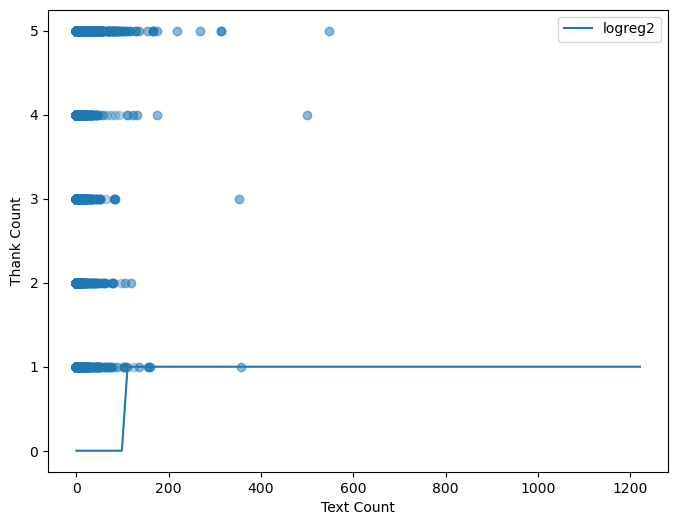

In [40]:
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range2 = logreg2.predict(X_range)
# Plot the scatter plot and the smooth curve
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X1, y, alpha=0.3)
ax.plot(X_range, y_range2, label='logreg2')
ax.legend()
ax.set_xlabel('Text Count')
ax.set_ylabel('Thank Count')
plt.show()

Book-comments

In [ ]:
df_books.head()

,title,authors,original_price,current_price,quantity,catagory,n_review,avg_rating,pages,manufacturer,cover_link
0,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11478,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...
1,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,86000,59900,7929.0,Sách tư duy - Kỹ năng sống,778,4.8,184,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/d7/99/24/1...
2,Những Tù Nhân Của Địa Lý,Tim Marshall,210000,126000,17896.0,Lĩnh vực khác,3621,4.8,430,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/8d/96/9e/c...
3,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,79000,47400,24668.0,Tác phẩm kinh điển,5131,5.0,228,Nhà Xuất Bản Hà Nội,https://salt.tikicdn.com/ts/product/45/3b/fc/a...
4,Một Thoáng Ta Rực Rỡ Ở Nhân Gian,NaN,135000,81000,10000.0,Tiểu Thuyết,1635,4.8,304,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/2f/b5/4e/a...


In [ ]:
df_books.shape

(1750, 11)

In [ ]:
df_books.describe()

,original_price,current_price,quantity,n_review,avg_rating
count,1.750000e+03,1.750000e+03,1705.000000,1750.000000,1750.000000
mean,1.573874e+05,1.143218e+05,2808.890323,336.859429,4.580800
std,1.275875e+05,1.023174e+05,17056.582900,754.723652,1.160463
min,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000
25%,8.900000e+04,6.017000e+04,175.000000,16.000000,4.800000
50%,1.290000e+05,8.750000e+04,565.000000,73.500000,4.800000
75%,1.890000e+05,1.330008e+05,2127.000000,302.750000,5.000000
max,1.550000e+06,1.200000e+06,671121.000000,11478.000000,5.000000


In [ ]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1750 non-null   object 
 1   authors         1609 non-null   object 
 2   original_price  1750 non-null   int64  
 3   current_price   1750 non-null   int64  
 4   quantity        1705 non-null   float64
 5   catagory        1750 non-null   object 
 6   n_review        1750 non-null   int64  
 7   avg_rating      1750 non-null   float64
 8   pages           1491 non-null   object 
 9   manufacturer    1495 non-null   object 
 10  cover_link      1750 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 150.5+ KB


In [ ]:
df_books.isnull().sum()

title               0
authors           141
original_price      0
current_price       0
quantity           45
catagory            0
n_review            0
avg_rating          0
pages             259
manufacturer      255
cover_link          0
dtype: int64

In [ ]:
df_books['avg_rating'].value_counts()

5.0    833
4.8    543
4.7    160
0.0    103
4.6     60
4.5     28
4.3      9
4.0      3
3.9      3
3.8      3
4.2      2
3.7      1
4.1      1
1.0      1
Name: avg_rating, dtype: int64

In [ ]:
df_books['avg_rating'].median()

4.8

C:\Users\marsen\AppData\Local\Temp\ipykernel_29176\1690902220.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_books['avg_rating'])


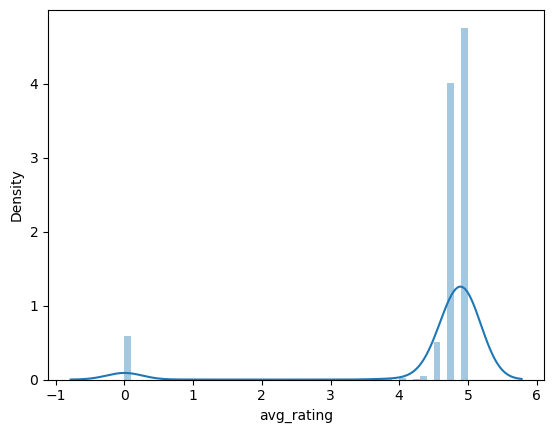

In [ ]:
#distribution of average rating
sns.distplot(df_books['avg_rating'])
plt.show()

Phần dữ liệu về đánh giá trung bình của sách bị lệch sang phải khá nhiều

In [ ]:
df_books['pages'].value_counts()

192       36
200       35
280       30
296       21
208       20
          ..
192000     1
127        1
60         1
71         1
167        1
Name: pages, Length: 377, dtype: int64

In [ ]:
#numeric the pages column
df_books['pages_fixed'] = pd.to_numeric(df_books['pages'], errors='coerce')
df_books['pages_fixed'].value_counts()


192.0       36
200.0       35
280.0       30
296.0       21
208.0       20
            ..
192000.0     1
127.0        1
60.0         1
71.0         1
167.0        1
Name: pages_fixed, Length: 376, dtype: int64

C:\Users\marsen\AppData\Local\Temp\ipykernel_29176\90913736.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_books['pages_fixed'])


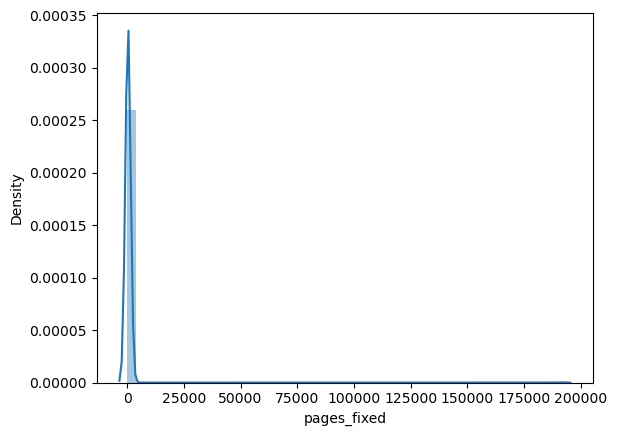

In [ ]:
#distribution of pages_fixed
sns.distplot(df_books['pages_fixed'])
plt.show()

Dữ liệu của số trang sách lệch sang trái, có một số trường hợp số trang rất lớn hoặc bằng 0, có thể là do quá trình crawl dữ liệu </br>

C:\Users\marsen\AppData\Local\Temp\ipykernel_29176\796781761.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_books.corr()


<AxesSubplot: >

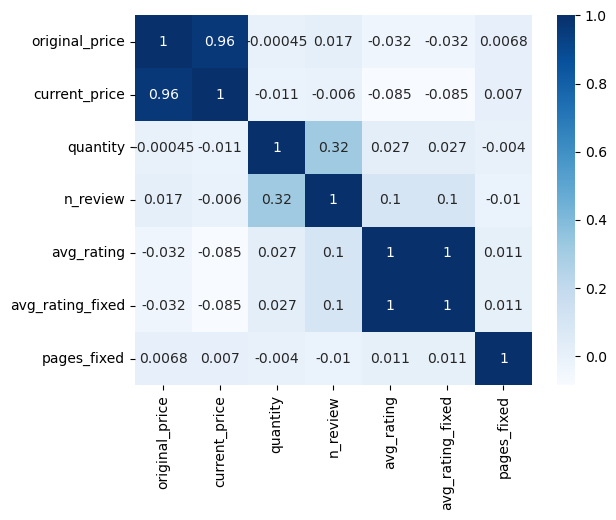

In [ ]:
corr = df_books.corr()
sns.heatmap(corr, annot=True, cmap='Blues')

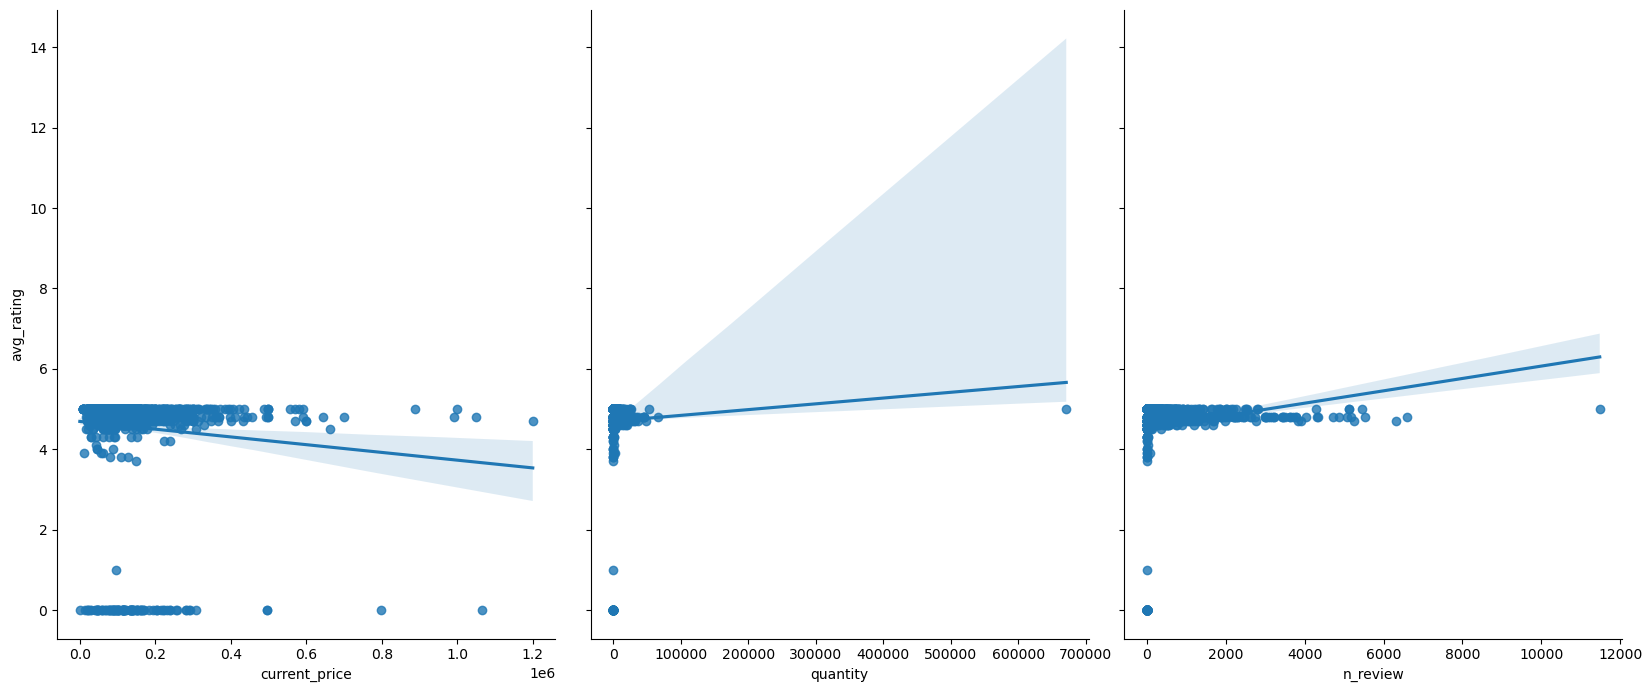

In [ ]:
#goal is to predict the average rating, plot the relationship between average rating and other variables
sns.pairplot(df_books, x_vars=['current_price', 'quantity', 'n_review'], y_vars='avg_rating', height=7, aspect=0.8, kind='reg')
plt.show()

In [ ]:
categorical_columns = ['catagory', 'manufacturer']
for col in categorical_columns:
    print(f"Frequency distribution for {col}:\n")
    print(df_books[col].value_counts())
    print("\n")

Frequency distribution for catagory:

Sách tư duy - Kỹ năng sống                                            294
Tiểu Thuyết                                                           135
Truyện ngắn - Tản văn - Tạp Văn                                       119
Truyện trinh thám                                                      54
Sách kỹ năng làm việc                                                  54
                                                                     ... 
Văn phòng thám tử quái vật - Tập 14                                     1
3x3 Eyes - Cô Bé Ba Mắt - Tập 01                                        1
Bá Tước Tiểu Thư Tập 8 [Tặng Kèm Lót Ly]                                1
Arya Bàn Bên Thỉnh Thoảng Lại Trêu Ghẹo Tôi Bằng Tiếng Nga – Tập 1      1
Kaguya-Sama: Cuộc Chiến Tỏ Tình - Tập 3                                 1
Name: catagory, Length: 356, dtype: int64


Frequency distribution for manufacturer:

Nhà Xuất Bản Thế Giới                      248
NXB Trẻ        

C:\Users\marsen\AppData\Local\Temp\ipykernel_29176\3631610530.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_books['diff'])


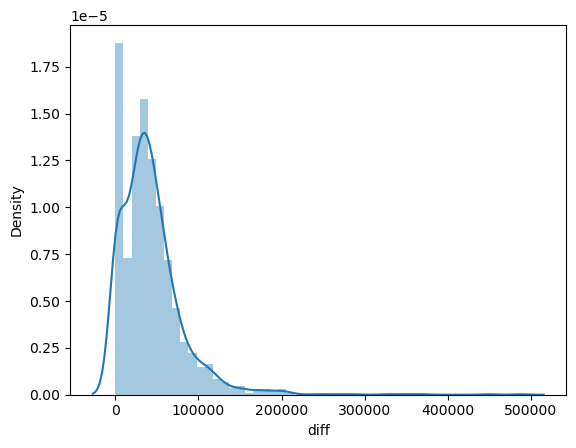

In [ ]:
#diff = original price - current price, plot distribution of diff
df_books['diff'] = df_books['original_price'] - df_books['current_price']
sns.distplot(df_books['diff'])
plt.show()

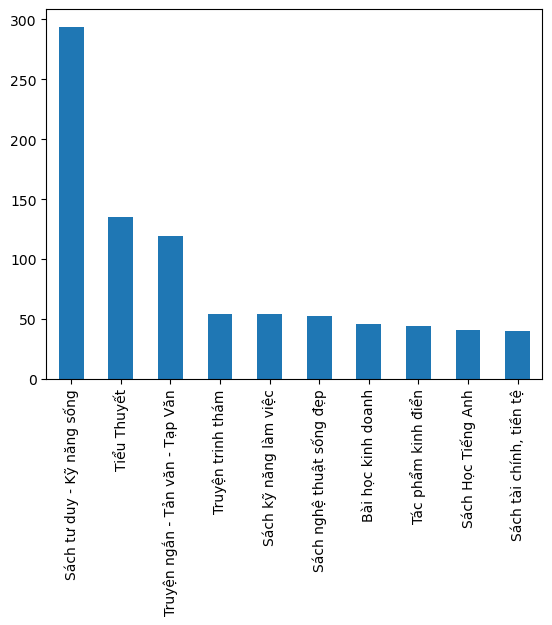

In [ ]:
#ranking top catalogies and manufacturers
df_books['catagory'].value_counts().head(10).plot(kind='bar')
plt.show()    

Phần lớn sách được mua là sách tư duy - kỹ năng sống (self help)

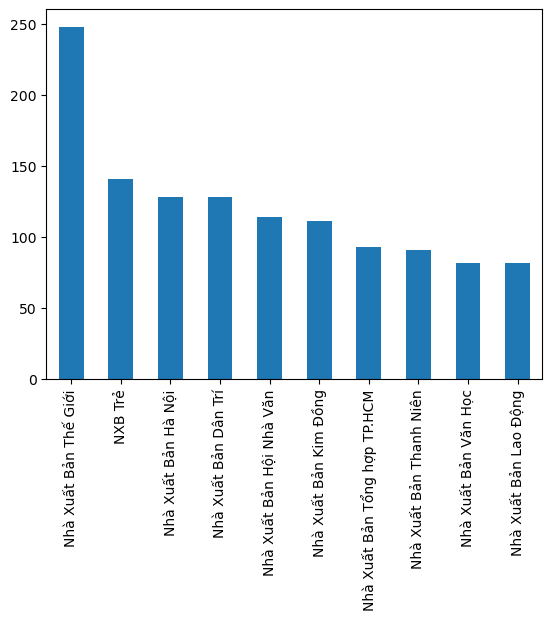

In [ ]:
df_books['manufacturer'].value_counts().head(10).plot(kind='bar')   
plt.show()

In [ ]:
df_books[df_books['manufacturer'] == 'Nhà Xuất Bản Thế Giới'][['title', 'authors']]

,title,authors
1,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư
10,Không Phải Sói Nhưng Cũng Đừng Là Cừu -Tặng kè...,Lê Bảo Ngọc
11,Càng Bình Tĩnh Càng Hạnh Phúc,Vãn Tình
16,"Thiên Tài Bên Trái, Kẻ Điên Bên Phải (Tái Bản)",Cao Minh
17,How Psychology Works - Hiểu Hết Về Tâm Lý Học,Jo Hemmings
...,...,...
1710,Bạn Đỡ Ngu Ngơ Rồi Đấy (Bạn Muốn Chế Ngự Tâm L...,David McRaney
1717,Hackers IELTS Basic- Speaking,Hackers
1721,Tâm Lý Học Thói Quen – Quan Sát Có Chủ Đích - ...,Chu Kiến Quốc
1729,Khả Năng Gặp Được Nửa Hoàn Hảo Của Mình Là Bao...,NaN


## PREPROCESSING

### IMPORT LIBRARIES

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from ydata_profiling import ProfileReport
from underthesea import word_tokenize, pos_tag, sent_tokenize
import regex
import demoji
import dask
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from dask.distributed import Client, LocalCluster
from pyvi import ViPosTagger, ViTokenizer
import string
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [42]:
df1 = pd.read_csv("comments.csv", encoding="utf-8")

In [43]:
df1.head()

,product_id,comment_id,title,thank_count,customer_id,rating,comment
0,74021317,12559756,Cực kì hài lòng,313,22051463,5,"Có những người bước đến, họ lấp đầy hạnh phúc ..."
1,74021317,16979365,Cực kì hài lòng,6,27791831,5,"Thấy nhiều bạn chê tiki gói hàng quá, may sao ..."
2,74021317,14069617,Cực kì hài lòng,25,17748750,5,"Bìa cực xinh, tiki giao hàng nhanh, sách không..."
3,74021317,8569824,Cực kì hài lòng,57,410797,5,"Sách lúc nhận hình thức rất ổn, không cong vên..."
4,74021317,18368714,Cực kì hài lòng,0,28545286,5,Một cuốn sách rất đáng đọc về tình yêu thương ...


In [44]:
df1.shape

(141281, 7)

In [45]:
df1['rating'].value_counts()

5    114514
4     14295
3      5276
1      4495
2      2701
Name: rating, dtype: int64

### CLASSIFICATION 

POSITIVE

In [46]:
df_notlike = df1[df1['rating'] < 3 ]

In [47]:
df_notlike.value_counts()

product_id  comment_id  title               thank_count  customer_id  rating  comment                                                                                                                                                                                                                                                                                                                  
527316      5688526     Không hài lòng      0            18990092     2       sách dơ, góc bị nhăn . Khá là buồn                                                                                                                                                                                                                                                                                           6
53095307    6786178     Không hài lòng      0            370250       2       sách mình mới mua dc vài hôm.hôm nay mở ra xem thì đã bị như thế này rồi. thật sự khá thật vọng. mong tiki xem xét lại khâu quản lí t

In [48]:
df_notlike.shape

(7196, 7)

NEUTRAL

In [49]:
df_neutral= df1[df1['rating'] == 3 ]

In [50]:
df_neutral.value_counts()

product_id  comment_id  title        thank_count  customer_id  rating  comment                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
53095307    12442991    Bình thường  0            2097970      3       Một câu chuyện đề tài gia đình vô cùng ý nghĩa. Hàng giao nhanh, bìa đẹp, đóng gói cẩn thận                                                                                                        

In [51]:
df_neutral.shape

(5276, 7)

LIKE

In [52]:
df_like = df1[df1['rating'] > 3 ]

In [53]:
df_like.value_counts()

product_id  comment_id  title            thank_count  customer_id  rating  comment                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
527316      728193      Cực kì hài lòng  0            1466782      5       sản phẩm tốt,nhưng có điều là sách hơi bị bẩn nhưng mà có thể chấp nhận được vì sự tận tình của nhân viên giao hàng cũng như là giao hàng rất sớm.Rất tin tưởng tiki                                                    

In [54]:
df_like.shape

(128809, 7)

### CHECK NAN VALUES

In [55]:
df2 = df1[["rating","comment"]].copy()

In [56]:
df2.isna().sum()

rating         0
comment    38018
dtype: int64

In [57]:
df2.isnull().sum()

rating         0
comment    38018
dtype: int64

In [58]:
df_isnull = df2[df2['comment'].isnull()]

In [59]:
df_count = df_isnull['rating'].value_counts()
df_result = pd.DataFrame(df_count)
df_result = df_result.reset_index()
df_result.columns = ['rating','value_counts']
print(df_result)

   rating  value_counts
0       5         35055
1       4          2906
2       3            45
3       1             9
4       2             3


#### Nhận xét
Phần lớn các comment chỉ đánh giá bằng rating và không nói gì thêm nằm ở mức số 5, tức là đại đa số khách hàng hài lòng sẽ không nói gì thêm. Ta có thể bỏ NaN values để bộ dữ liệu được cân bằng hơn.

In [60]:
df3 = df1[~df1['comment'].isnull()]

### CHECK AND DROP DUMPLICATES 

In [61]:
df3.duplicated().sum()

17264

In [62]:
df3.drop_duplicates(inplace=True)

In [63]:
for index, row in df3.sample(50).iterrows():
    print(row['comment'])

gói hàng cẩn thận lắm ý ạ, anh shipper cũng dĩa huông cực kì😳, có chống sốc nên sách k bị xướt gì hết nên mn yên tâm nhé. Truyện của nguyễn nhật ánh thì nội dụng khỏi phải bàn mn ạ, hay cực kì í
Sách không hay như các bạn cmt trên FB, không đọng lại gì nhiều
Đọc tuy khó hiểu vì rào cản ngôn ngữ tiếng Đức nhưng vì môn này mới lạ với bản thân nên thấy thú vị
Mình luôn đánh giá cao về tốc độ giao hàng của tiki, nhưng mà tốc độ giao hàng nhanh lại đi kèm với đóng hàng cẩu thả thì thôi không cần đâu nhá. Gói hàng của mình có 8 quyển sách, 2 đồ khuyến mại được ném tùy tiện vào trong 1 cái hộp, không có bọc chống sốc. Hộp hàng giao tới tay mình thì bị thủng 1 lỗ to, không biết là do quá trình vận chuyển bị va đập hay có người cố tình cạy ra (đơn giá trị cao lại được thanh toán trước rồi nên muốn tráo hàng hay gì??). 1 trong 2 món hàng khuyến mại thì không thấy đâu, không biết là do bị rơi từ cái lỗ kia hay là đóng thiếu hàng nữa. Tóm lại là lần đặt hàng này tại tiki khiến mình rất thất vọng.


In [64]:
df3.shape

(85999, 7)

### KEEP RATING COLUMN AND COMMENT COLUMN

In [65]:
df4 = df3[['rating','comment']]

In [66]:
conditions = [
    (df4['rating'] < 3),
    (df4['rating'] == 3),
    (df4['rating'] > 3)
]

values = ['negative', 'neutral', 'positive']

df4['class'] = np.select(conditions, values)
df4 = df4[['comment','class']]

In [67]:
df4.reset_index(drop=True, inplace=True)

In [68]:
df4.head()

,comment,class
0,"Có những người bước đến, họ lấp đầy hạnh phúc ...",positive
1,"Thấy nhiều bạn chê tiki gói hàng quá, may sao ...",positive
2,"Bìa cực xinh, tiki giao hàng nhanh, sách không...",positive
3,"Sách lúc nhận hình thức rất ổn, không cong vên...",positive
4,Một cuốn sách rất đáng đọc về tình yêu thương ...,positive


In [69]:
df4.isnull().sum()

comment    0
class      0
dtype: int64

In [70]:
df4['class'].value_counts()

positive    76005
negative     5666
neutral      4328
Name: class, dtype: int64

### CLEAN TEXT

In [71]:
from xulyvni import *
from dask import config

USE DASK FOR MULTIPLE PROCESSING

In [72]:
# Create a cluster
cluster = LocalCluster()
client = Client(cluster)
dask.config.set(scheduler='multiprocessing')

In [73]:
from xulyvni import xuly_vni

In [74]:
# CREATE DASK DATAFRAME FROM PANDAS DATAFRAME
ddf = dd.from_pandas(df4, npartitions=16)
ddf = ddf.map_partitions(xuly_vni)

In [75]:
# CONVERT DASK DF TO PANDAS DF
with ProgressBar():
    df = ddf.compute(num_workers=7)
del ddf

[########################################] | 100% Completed | 467.79 s


In [76]:
for index, row in df.sample(100).iterrows():
    print(row['processed_text'])

rất_thích
sách đẹp đẹp
chất_lượng tốt
sách rất_ý nghĩa
sách đọc rất_ưng chất_lượng giấy đóng_gói sản_phẩm mỉ nội sách thời trải_nghiệm
sách đẹp chữ_nổi tặng kèm rất_nhiều yêu
nội nhàm_chán hành_văn không_mạch lạc trừ khuyên
đọc vòng đoạn đọc đọc chú_ý ngẫm sách tuyệt_vời như_đợi câu trả_lời tìm_kiếm cạnh rất_nhiều kiến_thức lịch_sử giúp cũng_cố mở_rộng
bìa đẹp sách dày dính xíu bìa hàng
đọc nhận_xét nội sách lắm
hàng thất_vọng bìa sách đẹp ngoại_trừ vết tróc không_cả quyển thích bị_vậy hơi_buồn nội sách bàn hợp trường học động_lực đọc
đóng gói đẹp bạn_hàng nhiệt_tình
bìa cứng sách hình_ảnh trực_quan hơi_quăn góc
hàng gói hàng
giấy hình_ảnh sắc nét
nội sách thất_vọng diễn_đạt nội không_trùng khớp
đọc đầu thú_vị hẳn tác_phẩm liên_hệ rất_chặt chẽ tình_cảnh thế_giới hiện vén màng bí_ẩn bí_mật cường_quốc thế_giới vực cấm nguyền huyết_mạch lăng_mộ tần thủy_hoàng hứa_hẹn rất_nhiều thú_vị đọc quát hình_thức sách bìa đẹp chất_lượng giấy cũng_tốt hẳn bọc bookmark
đọc rất_có rất_nhiều góc táo_bạo

In [77]:
df.reset_index(drop=True, inplace=True)

In [78]:
df_final = df[['processed_text','class']]

In [79]:
# COMMENTS HAVE LESS THAN 3 WORDS WILL BE REMOVED
df_final['word_count'] = df_final['processed_text'].apply(lambda x: len(str(x).split(" ")))
df_final = df_final[df_final['word_count'] > 2]
df_final['class'].value_counts()

positive    60447
negative     5283
neutral      4012
Name: class, dtype: int64

In [80]:
df_final.head()

,processed_text,class,word_count
0,lấp hạnh_phúc vết nứt ủi chữa vỡ trái câu_chuy...,positive,60
1,chê gói hàng quá_hàng không_bị hư tẹo hơi_sơ s...,positive,24
2,bìa cực hàng sách không_bị nhăn góc gãy cạnh b...,positive,64
3,sách hình_thức rất_ổn không_vênh xước gãy đơn ...,positive,44
4,sách rất_đáng đọc tình_yêu_thương mất_mát gợi_...,positive,55


In [81]:
df_final.to_csv('comments_final.csv')

### VISUALIZE

Negative

In [82]:
df_final_notlike = df_final[df_final['class'] == 'negative' ]
wc_notlike = WordCloud(
    background_color='black',
    max_words=500
)
wc_notlike.generate(str(df_final_notlike['processed_text'].values))

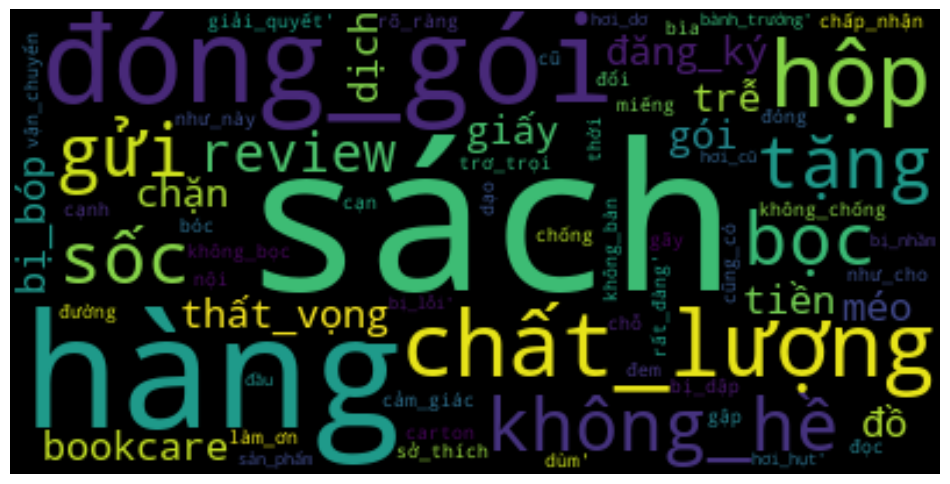

In [83]:
plt.figure(figsize=(12, 12))
plt.imshow(wc_notlike, interpolation='bilinear')
plt.axis('off')
plt.show()

Neutral

In [84]:
df_final_neutral = df_final[df_final['class'] == 'neutral' ]
wc_neutral = WordCloud(
    background_color='black',
    max_words=500
)
wc_neutral.generate(str(df_final_neutral['processed_text'].values))

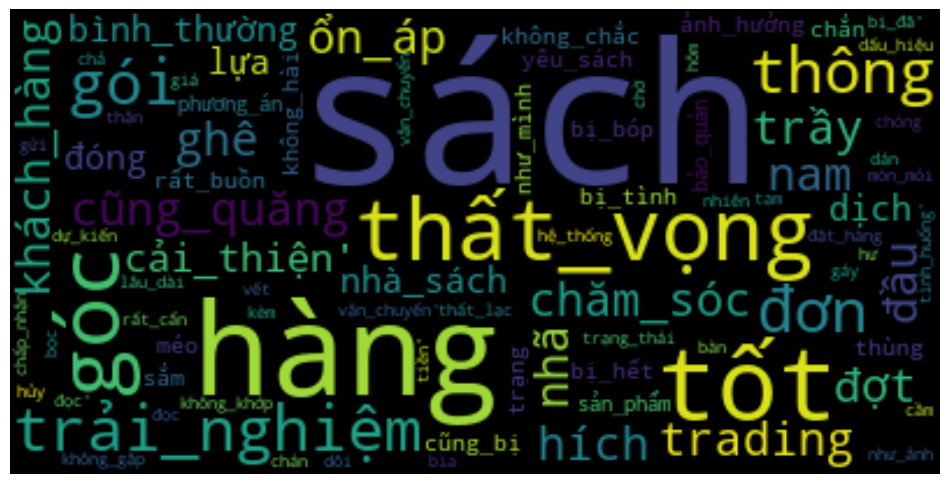

In [85]:
plt.figure(figsize=(12, 12))
plt.imshow(wc_neutral, interpolation='bilinear')
plt.axis('off')
plt.show()

Positive

In [86]:
df_final_like = df_final[df_final['class'] == 'positive' ]
wc_like = WordCloud(
    background_color='black',
    max_words=500
)
wc_like.generate(str(df_final_like['processed_text'].values))

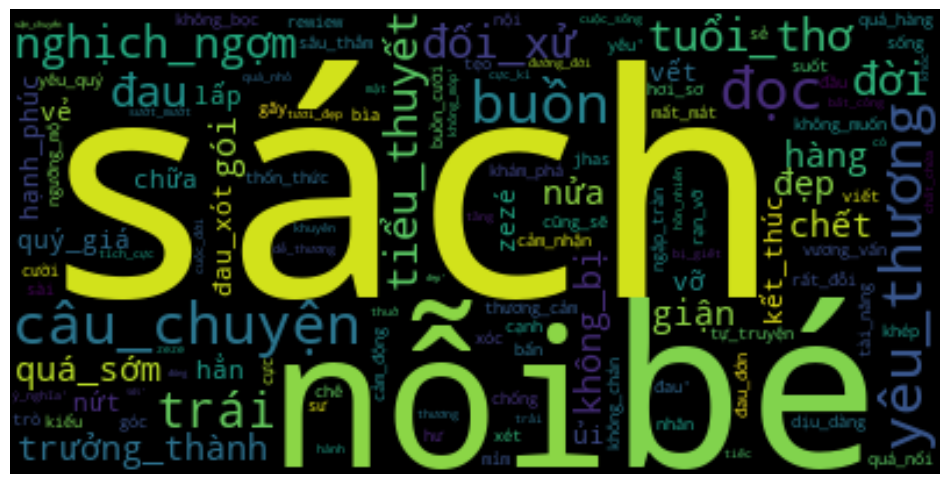

In [87]:
plt.figure(figsize=(12, 12))
plt.imshow(wc_like, interpolation='bilinear')
plt.axis('off')
plt.show()

Sau khi thực hiện quá trình tiền xử lí, nhận thấy bộ dữ liệu còn nhiều nội dung chưa chuẩn như hình thái chưa đúng với bình luận, chúng em đã xử lí bằng cách gán nhãn bằng tay cho hơn 40.000 câu.

## MODEL PRESELECTION WITH LAZYPREDICT

### PREPARE

IMPORT LIBRARIES

In [88]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from lazypredict.Supervised import LazyClassifier

LOAD DATA

In [89]:
data = pd.read_csv("comments_final2.csv", encoding='utf-8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36932 entries, 0 to 36931
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Column1         36932 non-null  int64 
 1   processed_text  36932 non-null  object
 2   class           36932 non-null  object
 3   word_count      36932 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


In [90]:
data['class'].value_counts()

positive    27643
negative     5279
neutral      4010
Name: class, dtype: int64

([<matplotlib.patches.Wedge at 0x1dfc5f12bc0>,
 [Text(0.09889122771092497, -1.1959182769244001, 'Positive'),
  Text(0.28130501860981283, 1.063422534322521, 'Negative'),
  Text(-0.5575638640277112, 0.9482207219474209, 'Neutral')],
 [Text(0.05768654949803956, -0.6976189948725666, '74.8%'),
  Text(0.1534391010598979, 0.5800486550850114, '14.3%'),
  Text(-0.30412574401511516, 0.5172113028804113, '10.9%')])

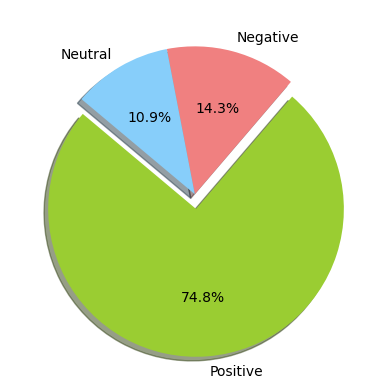

In [91]:
#create pie chart to compare numbers of comments in each class
import matplotlib.pyplot as plt
labels = ['Positive', 'Negative', 'Neutral']
sizes = [data['class'].value_counts()[0], data['class'].value_counts()[1], data['class'].value_counts()[2]]
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

In [92]:
df_sub= data.sample(frac=0.02)

In [93]:
source = df_sub['processed_text']
target = df_sub['class']

### LAZY PREDICT (WITH 3 CLASSES)

In [94]:
target = target.replace("negative", 0)
target = target.replace("neutral", 1)
target = target.replace("positive", 2)

TF-IDF

In [95]:
# Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=0.02)

In [96]:
# Fit the TfidfVectorizer object to the data
x = tfidf_vectorizer.fit(df_sub['processed_text'].values.astype('U'))

In [97]:
# Transform the data
X = tfidf_vectorizer.transform(df_sub['processed_text'].values.astype('U'))

In [98]:
### BUG: 
# This is probably because you are using an older scikit-learn version than the one this code was written for.
# get_feature_names_out is a method of the class sklearn.feature_extraction.text.TfidfVectorizer since scikit-learn 1.0. Previously, there was a similar method called get_feature_names.
# So you should update your scikit-learn package, or use the old method (not recommended).
# Create a new dataframe with the transformed data
df_new = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [99]:
X = X.toarray()

In [100]:
y = np.array(target)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

In [102]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:03<00:00,  9.01it/s]


In [103]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.80,0.53,None,0.78,0.01
ExtraTreesClassifier,0.82,0.51,None,0.79,0.25
RidgeClassifierCV,0.82,0.50,None,0.78,0.02
RidgeClassifier,0.82,0.50,None,0.78,0.04
PassiveAggressiveClassifier,0.76,0.50,None,0.76,0.02
SGDClassifier,0.76,0.49,None,0.75,0.04
NearestCentroid,0.70,0.49,None,0.73,0.06
LinearDiscriminantAnalysis,0.79,0.48,None,0.76,0.03
RandomForestClassifier,0.82,0.48,None,0.78,0.31


### LAZY PREDICT (WITH 2 CLASSES)

In [104]:
df_sub2 = df_sub

In [105]:
df_sub2['class'] = df_sub2['class'].apply(lambda x: 0 if x == 'negative' or x== 'neutral' else 1 )

In [106]:
df_sub2['class'].value_counts()

1    557
0    182
Name: class, dtype: int64

In [107]:
target2 = df_sub2['class']

In [108]:
# Fit the TfidfVectorizer object to the data
x_2 = tfidf_vectorizer.fit(df_sub2['processed_text'].values.astype('U'))

In [109]:
# Transform the data
X2 = tfidf_vectorizer.transform(df_sub2['processed_text'].values.astype('U'))

In [110]:
X2 = X2.toarray()

In [111]:
y2 = np.array(target2)

In [112]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20) 

In [113]:
models2, predictions2 = clf.fit(X_train2, X_test2, y_train2, y_test2)

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 29/29 [00:02<00:00, 13.00it/s]


In [114]:
models2

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.72,0.73,0.73,0.74,0.05
BernoulliNB,0.80,0.72,0.72,0.80,0.02
NearestCentroid,0.74,0.69,0.69,0.75,0.07
GaussianNB,0.57,0.69,0.69,0.59,0.01
AdaBoostClassifier,0.80,0.67,0.67,0.79,0.19
PassiveAggressiveClassifier,0.77,0.67,0.67,0.77,0.02
LogisticRegression,0.77,0.67,0.67,0.77,0.04
LinearDiscriminantAnalysis,0.77,0.67,0.67,0.77,0.02
LinearSVC,0.76,0.67,0.67,0.76,0.13


### RESAMPLING

In [115]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [116]:
smt = SMOTE()
X_smt, y_smt = smt.fit_resample(X,y)

In [117]:
X_train_smt, X_test_smt, y_train_smt, y_test_smt = train_test_split(X_smt, y_smt, test_size=0.20) 

### SMOTE for 3 classes

In [118]:
models_smt, predictions_smt = clf.fit(X_train_smt, X_test_smt, y_train_smt, y_test_smt)

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 29/29 [00:06<00:00,  4.44it/s]


In [119]:
models_smt

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.93,0.94,None,0.93,0.37
RandomForestClassifier,0.90,0.91,None,0.90,0.44
LGBMClassifier,0.90,0.90,None,0.90,0.31
QuadraticDiscriminantAnalysis,0.90,0.90,None,0.90,0.03
XGBClassifier,0.90,0.90,None,0.90,0.41
SVC,0.89,0.90,None,0.89,0.19
NuSVC,0.86,0.87,None,0.86,0.21
BaggingClassifier,0.84,0.84,None,0.84,0.21
DecisionTreeClassifier,0.79,0.80,None,0.79,0.04


In [120]:
X_smt2, y_smt2 = smt.fit_resample(X2,y2)

In [121]:
X_train_smt2, X_test_smt2, y_train_smt2, y_test_smt2 = train_test_split(X_smt2, y_smt2, 
                                                    test_size=0.20) 

In [122]:
models_smt2, predictions_smt2 = clf.fit(X_train_smt2, X_test_smt2, y_train_smt2, y_test_smt2)

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 29/29 [00:02<00:00, 10.05it/s]


### SMOTE for 2 CLasses

In [123]:
models_smt2

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.90,0.89,0.89,0.90,0.08
ExtraTreesClassifier,0.89,0.89,0.89,0.89,0.31
NuSVC,0.89,0.89,0.89,0.89,0.08
RandomForestClassifier,0.85,0.85,0.85,0.85,0.35
XGBClassifier,0.84,0.84,0.84,0.84,0.12
ExtraTreeClassifier,0.85,0.84,0.84,0.85,0.02
LGBMClassifier,0.81,0.81,0.81,0.81,0.13
BaggingClassifier,0.81,0.80,0.80,0.81,0.15
NearestCentroid,0.79,0.80,0.80,0.79,0.07


## Kết luận

Sau khi thử nghiệm với nhiều mô hình, có những mô hình đạt hiệu quả rất cao trong phân loại 2 lớp, nhưng lại chậm hơn trong phân loại 3 lớp và ngược lại. Tuy nhiên chỉ có Logistic Regression là đạt được sự cân bằng và ổn định trong việc huấn luyện tất cả các lớp, nên nhóm quyết định chọn Logistic Regression là mô hình chính để tối ưu và đưa vào tính toán.

## ANALYSIS WITH 2 CLASSES

### PREPARE

In [158]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import pickle
from sklearn. metrics import classification_report, roc_auc_score, roc_curve

In [159]:
df = pd.read_csv("comments_final2.csv", encoding="utf-8", index_col=0)

In [160]:
df.shape

(36932, 3)

In [161]:
df.head()

,processed_text,class,word_count
Column1,,,
601,sách không_đối thần,neutral,3
3070,tuyệt_đối lượm lỗi,negative,3
3370,chữ đọc dịch,negative,3
3784,quá_thất vọng hàng,negative,3
3881,bì bị_nhăn góc,neutral,3


In [162]:
df['class'] = df['class'].apply(lambda x: 0 if x == 'negative' or x== 'neutral' else 1 )

In [163]:
df['class'].value_counts()

1    27643
0     9289
Name: class, dtype: int64

### CHECK NAN VALUES

In [164]:
print('Data shape:', df.shape)
missing_val_num = df.isnull().sum()
missing_percent = (missing_val_num / df.shape[0]) * 100
missing_info = {'missing_values': missing_val_num,
                'missing_percent': round(missing_percent,3)}
missing_df = pd.DataFrame(missing_info)
missing_df

Data shape: (36932, 3)


,missing_values,missing_percent
processed_text,0,0.00
class,0,0.00
word_count,0,0.00


In [165]:
# Drop all rows with NaN values
df.dropna(inplace=True)
print(df.shape)
print(df.isnull().sum())

(36932, 3)
processed_text    0
class             0
word_count        0
dtype: int64


### DUPLICATE DATA

In [166]:
# Display duplicate rows
print('Duplicate data:', df.duplicated().sum())
df[df.duplicated()]

Duplicate data: 1350


,processed_text,class,word_count
Column1,,,
17095,chờ tuần sách,0,3
23289,sản_phẩm rất_tệ tưởng,0,3
27948,bọc sách hỏng,0,3
28462,truyện rách bìa,0,3
33421,không_bookcare không_đóng gói,0,3
...,...,...,...
20925,mặt đóng_gói hàng dịch chấp_nhận đóng_gói sơ_s...,1,91
29701,mặt đóng_gói hàng dịch chấp_nhận đóng_gói sơ_s...,1,91
51199,đóng gói hàng ẩu_tả sách bị_móp góc kiểm chất_...,0,99


In [167]:
# Drop all duplicate rows
df.drop_duplicates(inplace=True)
print('Duplicate data:', df.duplicated().sum())
print(df.shape)
# Reset index
df.reset_index(drop=True, inplace=True)

Duplicate data: 0
(35582, 3)


In [168]:
df['class'].value_counts()

1    26615
0     8967
Name: class, dtype: int64

### TF-IDF Vectorizer

In [169]:
# Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=0.02)

In [170]:
# Fit the TfidfVectorizer object to the data
x = tfidf_vectorizer.fit(df['processed_text'].values.astype('U'))

In [171]:
# Transform the data
X = tfidf_vectorizer.transform(df['processed_text'].values.astype('U'))

In [172]:
### BUG: 
# This is probably because you are using an older scikit-learn version than the one this code was written for.
# get_feature_names_out is a method of the class sklearn.feature_extraction.text.TfidfVectorizer since scikit-learn 1.0. Previously, there was a similar method called get_feature_names.
# So you should update your scikit-learn package, or use the old method (not recommended).
# Create a new dataframe with the transformed data
df_new = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [173]:
df_new.head()

,bàn,bé,bìa,bìa sách,bẩn,bọc,chất_lượng,chất_lượng sách,chống,chống sốc,...,đóng gói,đóng_gói,đóng_gói cẩn_thận,đơn,đầu,đẹp,đọc,đọc sách,đổi,ổn
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [174]:
y = df['class']

In [175]:
print(X.shape, y.shape)

(35582, 107) (35582,)


### Resampling with SMOTE

In [176]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [177]:
smt = SMOTE()
X_smt, y_smt = smt.fit_resample(X,y)

### Cross Validation

In [178]:
# Choose 0.3, 0.2 as the test size
test_size_list = [.3, .2]
# Run 5 times for each test_size
for test_size in test_size_list:
  print('Test size: ', test_size)
  accuracy_train_list = []
  accuracy_test_list = []
  for i in range(5):
    print('Run: ', i)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    # Create a LogisticReg (for faster training)
    clf = LogisticRegression()
    # Train the classifier
    clf.fit(X_train, y_train)
    # Make predictions
    y_pred = clf.predict(X_test)
    # Calculate the accuracy
    accuracy_train = accuracy_score(y_train, clf.predict(X_train))
    accuracy_test = accuracy_score(y_test, y_pred)
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)
  print('Test size: ', test_size, ' Train accuracy: ', sum(accuracy_train_list) / len(accuracy_train_list), ' Test accuracy: ',
      sum(accuracy_test_list) / len(accuracy_test_list))
  print('--------------------------------------------------')

Test size:  0.3
Run:  0
Run:  1
Run:  2
Run:  3
Run:  4
Test size:  0.3  Train accuracy:  0.8045930862809652  Test accuracy:  0.8017798594847776
--------------------------------------------------
Test size:  0.2
Run:  0
Run:  1
Run:  2
Run:  3
Run:  4
Test size:  0.2  Train accuracy:  0.8039627612857896  Test accuracy:  0.8042714626949558
--------------------------------------------------


In [179]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model Comparision

In [180]:
models = [
    ExtraTreesClassifier(n_estimators=50),
    ExtraTreesClassifier(n_estimators=100),
    KNeighborsClassifier(n_neighbors=3),
    KNeighborsClassifier(n_neighbors=5),
    KNeighborsClassifier(n_neighbors=7),
    XGBClassifier(),
    LogisticRegression(multi_class='multinomial') 
]

In [181]:
def get_model_name(model):
  model_name = model.__class__.__name__
  if model_name == 'ExtraTreesClassifier':
    model_name = model_name + '_' + str(model.n_estimators)
  elif model_name == 'KNeighborsClassifier':
    model_name = model_name + '_' + str(model.n_neighbors)
    
  return model_name

In [182]:
# Number of folds for cross validation
num_folds = 5
# A dataframe to store the results
results = pd.DataFrame(columns=['Model', 'Accuracy Mean', 'Accuracy 3 * STD', 'Time'])
# Integrate through models
for model in models:
  # Get model name
  model_name = get_model_name(model)  
  print('Model: ', model_name, 'running...')
  # Get the current time
  start_time = datetime.now()  
  # Perform cross validation
  cv_results = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='accuracy', n_jobs=-1)  
  # Get the training time
  train_time = datetime.now() - start_time  
  # Get the mean and std of the results
  mean_cv_results = cv_results.mean()
  std_cv_results = cv_results.std()  
  # Store the results
  results = results.append({'Model': model_name,
                            'Accuracy Mean': mean_cv_results,
                            'Accuracy 3 * STD': 3 * std_cv_results,
                            'Time': train_time
                            }, ignore_index=True)

Model:  ExtraTreesClassifier_50 running...
Model:  ExtraTreesClassifier_100 running...
Model:  KNeighborsClassifier_3 running...
Model:  KNeighborsClassifier_5 running...
Model:  KNeighborsClassifier_7 running...
Model:  XGBClassifier running...
Model:  LogisticRegression running...


### Metric result

In [183]:
# Sort the dataframe by Accuracy Mean in descending order
results = results.sort_values(by='Accuracy Mean', ascending=False).reset_index(drop=True)
results

,Model,Accuracy Mean,Accuracy 3 * STD,Time
0,XGBClassifier,0.80,0.01,0 days 00:00:05.589158
1,ExtraTreesClassifier_100,0.80,0.01,0 days 00:00:24.407032
2,LogisticRegression,0.80,0.01,0 days 00:00:00.389448
3,ExtraTreesClassifier_50,0.80,0.01,0 days 00:00:16.152022
4,KNeighborsClassifier_7,0.78,0.01,0 days 00:00:05.688915
5,KNeighborsClassifier_5,0.77,0.01,0 days 00:00:06.291974
6,KNeighborsClassifier_3,0.76,0.01,0 days 00:00:06.348788


Text(0.5, 1.0, 'Model Comparison')

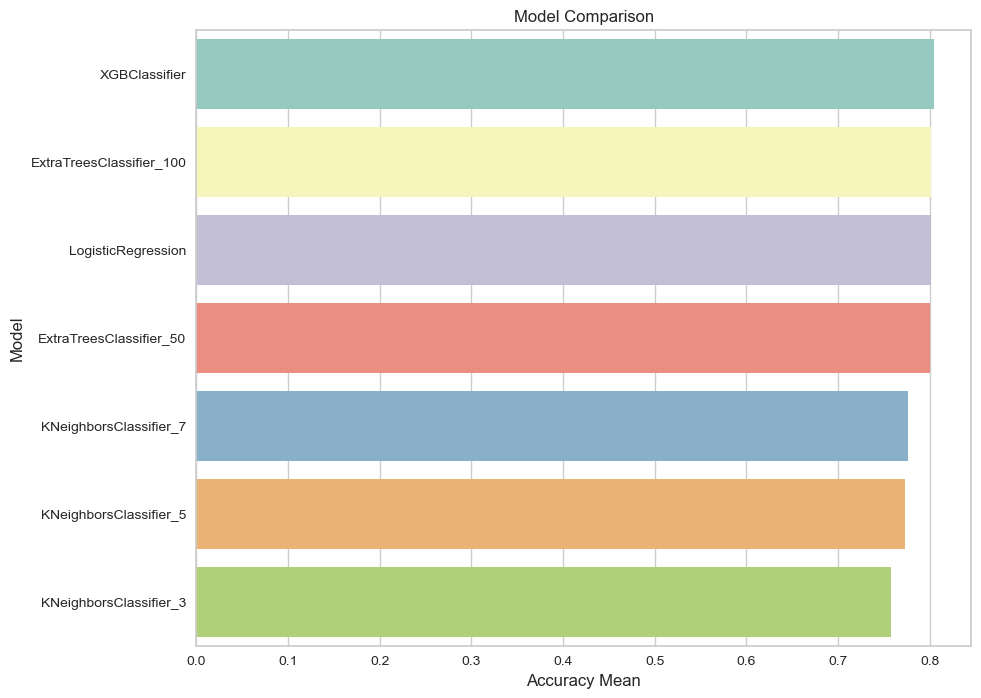

In [184]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Accuracy Mean', y='Model', data=results, palette='Set3')
plt.title('Model Comparison')

###
- Như vậy, ta có thể sơ bộ thấy mô hình logistic Reg cho kết quả tốt hơn các mô hình còn lại

### Classification Report

### 
- Đối với bài toán phân loại này, chúng ta cần quan tâm tới high Recall rating not_like.
- với high Recall cao, thì các True rating not-like phải cao, còn các False-not_like dự báo có thể cao hoặc thấp.
- Như vậy ta chon Logistic Regression cho việc tinh chỉnh mô hình tối ưu.

### Logistic Regression

#### Hyperparameter tuning

In [185]:
# Use GridSearchCV to find the best parameters for the models
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# Create a list of parameters of Logistic Regression for the GridSearchCV
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
#param_grid = {
    #'n_estimators': [100,300, 500, 1000],
    #'learning_rate':[0.001,0.01,0.1, 1]
#}
# Create a list of models to test
clf_grid = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,cv=5, scoring='accuracy', error_score=0)
search_clf = clf_grid.fit(X_train, y_train)
best_clf = search_clf.best_estimator_

##Score
#cross_clf = cross_val_score(best_clf, X_test, y_test, scoring='accuracy', cv=5, n_jobs=-1)

In [186]:
print('Best params:', search_clf.best_params_)

Best params: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


#### Best Params

In [187]:
## Create the best model
best_model = LogisticRegression(C= 100,penalty='l2',solver= 'newton-cg')
# Fit the best model to the training data
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

#### Metrics to Report

In [188]:
# Get the accuracy score for the best model
accuracy_train = round(best_model.score(X_train, y_train) * 100, 3)
accuracy_test = round(best_model.score(X_test, y_test) * 100, 3)
print('Accuracy score for the best model on the training data: ', accuracy_train)
print('Accuracy score for the best model on the test data: ', accuracy_test)

Accuracy score for the best model on the training data:  80.347
Accuracy score for the best model on the test data:  80.581


              precision    recall  f1-score   support

           0       0.69      0.42      0.53      2718
           1       0.83      0.94      0.88      7957

    accuracy                           0.81     10675
   macro avg       0.76      0.68      0.70     10675
weighted avg       0.79      0.81      0.79     10675



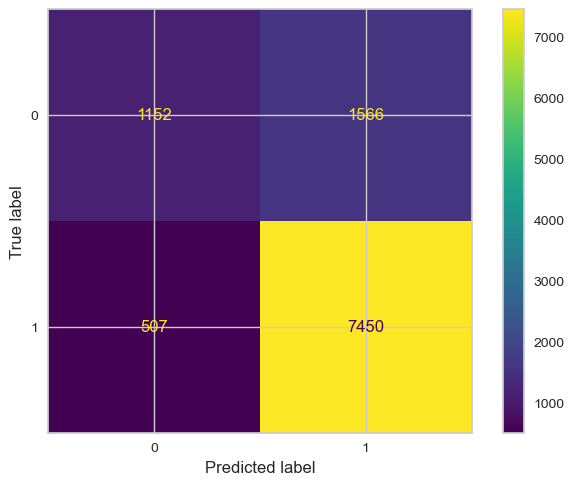

In [189]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

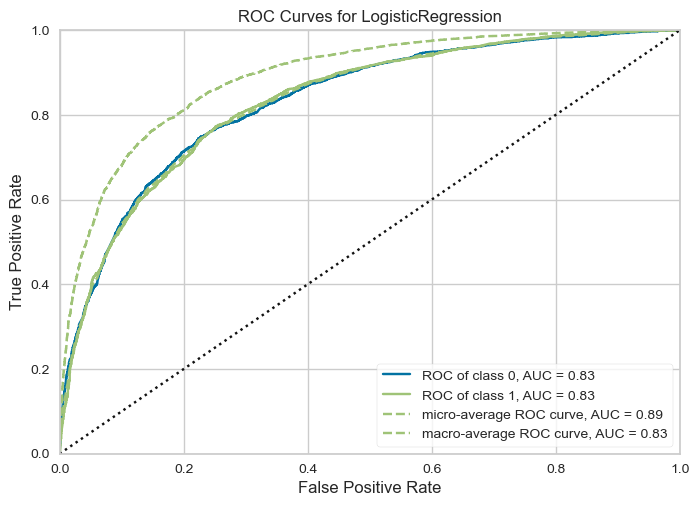

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [190]:
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, roc_auc
visualizer = ROCAUC(best_model, classes=y.unique())

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

### Naive Bayes

#### Hyperparameter tuning

In [191]:
# Use GridSearchCV to find the best parameters for the models
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# Create a list of parameters of Naive Bayes for the GridSearchCV
# define models and parameters
model2 = MultinomialNB()
alpha = [0.1, 0.5, 1.0, 10.0]
fit_prior = [True, False]

grid2 = dict(alpha=alpha, fit_prior=fit_prior)
#param_grid = {
    #'n_estimators': [100,300, 500, 1000],
    #'learning_rate':[0.001,0.01,0.1, 1]
#}
# Create a list of models to test
clf_grid2 = GridSearchCV(estimator=model2, param_grid=grid2, n_jobs=-1,cv=5, scoring='accuracy', error_score=0)
search_clf2 = clf_grid2.fit(X_train, y_train)
best_clf2 = search_clf2.best_estimator_  
##Score
#cross_clf = cross_val_score(best_clf, X_test, y_test, scoring='accuracy', cv=5, n_jobs=-1)

In [192]:
print('Best params:', search_clf2.best_params_)

Best params: {'alpha': 1.0, 'fit_prior': True}


#### Best Params

In [193]:
#create best model
best_model2 = MultinomialNB(alpha=0.1, fit_prior=True)
# Fit the best model to the training data
best_model2.fit(X_train, y_train)
y_pred2 = best_model2.predict(X_test)

#### Metrics to Report

In [194]:
# Get the accuracy score for the best model
accuracy_train2 = round(best_model2.score(X_train, y_train) * 100, 3)
accuracy_test2 = round(best_model2.score(X_test, y_test) * 100, 3)
print('Accuracy score for the best model on the training data: ', accuracy_train2)
print('Accuracy score for the best model on the test data: ', accuracy_test2)

Accuracy score for the best model on the training data:  78.837
Accuracy score for the best model on the test data:  79.035


              precision    recall  f1-score   support

           0       0.77      0.25      0.38      2718
           1       0.79      0.97      0.87      7957

    accuracy                           0.79     10675
   macro avg       0.78      0.61      0.63     10675
weighted avg       0.79      0.79      0.75     10675



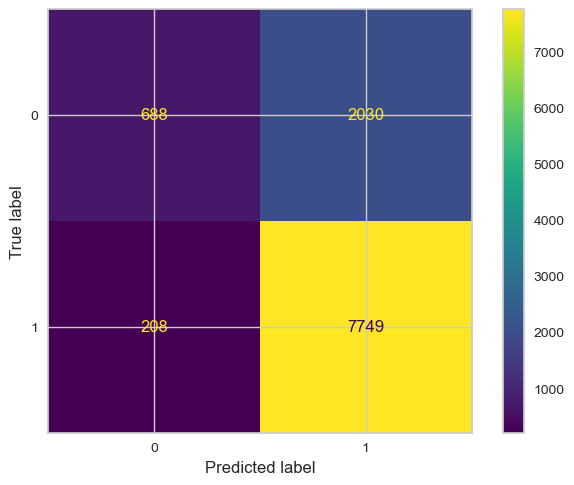

In [195]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred2))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred2)

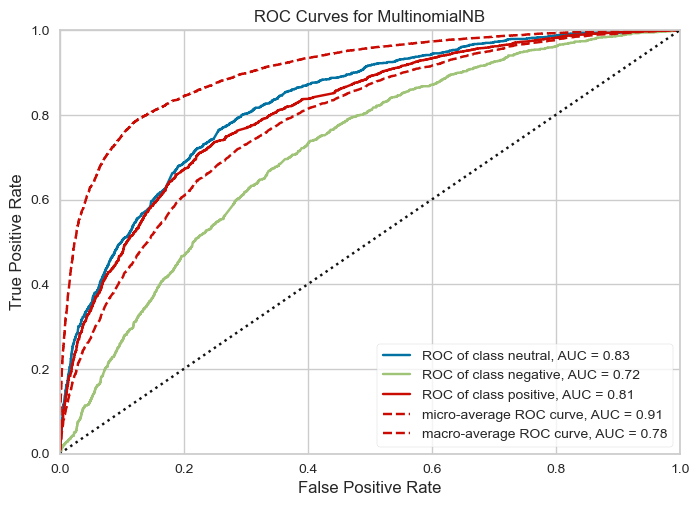

<Axes: title={'center': 'ROC Curves for MultinomialNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [296]:
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, roc_auc
visualizer = ROCAUC(best_model2, classes=y.unique())

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

## ANALYSIS WITH 3 CLASSES

### PREPARE

In [196]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import pickle
from sklearn. metrics import classification_report, roc_auc_score, roc_curve

In [197]:
df = pd.read_csv("comments_final2.csv", encoding="utf-8", index_col=0)

In [198]:
df.shape

(36932, 3)

In [199]:
df.head()

,processed_text,class,word_count
Column1,,,
601,sách không_đối thần,neutral,3
3070,tuyệt_đối lượm lỗi,negative,3
3370,chữ đọc dịch,negative,3
3784,quá_thất vọng hàng,negative,3
3881,bì bị_nhăn góc,neutral,3


### Duplicate Data

In [200]:
# Display duplicate rows
print('Duplicate data:', df.duplicated().sum())
df[df.duplicated()]

Duplicate data: 1334


,processed_text,class,word_count
Column1,,,
17095,chờ tuần sách,negative,3
23289,sản_phẩm rất_tệ tưởng,negative,3
27948,bọc sách hỏng,negative,3
28462,truyện rách bìa,negative,3
33421,không_bookcare không_đóng gói,negative,3
...,...,...,...
20925,mặt đóng_gói hàng dịch chấp_nhận đóng_gói sơ_s...,positive,91
29701,mặt đóng_gói hàng dịch chấp_nhận đóng_gói sơ_s...,positive,91
51199,đóng gói hàng ẩu_tả sách bị_móp góc kiểm chất_...,negative,99


In [201]:
# Drop all duplicate rows
df.drop_duplicates(inplace=True)
print('Duplicate data:', df.duplicated().sum())
print(df.shape)
# Reset index
df.reset_index(drop=True, inplace=True)

Duplicate data: 0
(35598, 3)


In [202]:
df['class'].value_counts()

positive    26615
negative     5058
neutral      3925
Name: class, dtype: int64

### TF-IDF Vectorizer

In [203]:
# Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=0.02)

In [204]:
# Fit the TfidfVectorizer object to the data
x = tfidf_vectorizer.fit(df['processed_text'].values.astype('U'))

In [205]:
# Transform the data
X = tfidf_vectorizer.transform(df['processed_text'].values.astype('U'))

In [206]:
### BUG: 
# This is probably because you are using an older scikit-learn version than the one this code was written for.
# get_feature_names_out is a method of the class sklearn.feature_extraction.text.TfidfVectorizer since scikit-learn 1.0. Previously, there was a similar method called get_feature_names.
# So you should update your scikit-learn package, or use the old method (not recommended).
# Create a new dataframe with the transformed data
df_new = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [207]:
df_new.head()

,bàn,bé,bìa,bìa sách,bẩn,bọc,chất_lượng,chất_lượng sách,chống,chống sốc,...,đóng gói,đóng_gói,đóng_gói cẩn_thận,đơn,đầu,đẹp,đọc,đọc sách,đổi,ổn
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [208]:
y = df['class']

In [209]:
print(X.shape, y.shape)

(35598, 107) (35598,)


### Cross Validation

In [210]:
# Choose 0.3, 0.2 as the test size
test_size_list = [.3, .2]
# Run 5 times for each test_size
for test_size in test_size_list:
  print('Test size: ', test_size)
  accuracy_train_list = []
  accuracy_test_list = []
  for i in range(5):
    print('Run: ', i)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    # Create a LogisticReg (for faster training)
    clf = LogisticRegression()
    # Train the classifier
    clf.fit(X_train, y_train)
    # Make predictions
    y_pred = clf.predict(X_test)
    # Calculate the accuracy
    accuracy_train = accuracy_score(y_train, clf.predict(X_train))
    accuracy_test = accuracy_score(y_test, y_pred)
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)
  print('Test size: ', test_size, ' Train accuracy: ', sum(accuracy_train_list) / len(accuracy_train_list), ' Test accuracy: ',
      sum(accuracy_test_list) / len(accuracy_test_list))
  print('--------------------------------------------------')

Test size:  0.3
Run:  0
Run:  1
Run:  2
Run:  3
Run:  4
Test size:  0.3  Train accuracy:  0.7759932578858656  Test accuracy:  0.7743258426966293
--------------------------------------------------
Test size:  0.2
Run:  0
Run:  1
Run:  2
Run:  3
Run:  4
Test size:  0.2  Train accuracy:  0.7755390125711076  Test accuracy:  0.7750561797752809
--------------------------------------------------


In [211]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model Comparision

In [212]:
models = [
    RandomForestClassifier(n_estimators=50),
    RandomForestClassifier(n_estimators=100),
    KNeighborsClassifier(n_neighbors=3),
    KNeighborsClassifier(n_neighbors=5),
    KNeighborsClassifier(n_neighbors=7),
    LogisticRegression(multi_class='multinomial'),
    SVC(kernel='sigmoid'),
    MultinomialNB(),
]

In [213]:
def get_model_name(model):
  model_name = model.__class__.__name__
  if model_name == 'KNeighborsClassifier':
    model_name = model_name + '_' + str(model.n_neighbors)
  elif model_name == 'RandomForestClassifier':
    model_name = model_name + '_' + str(model.n_estimators)
    
  return model_name

In [214]:
# Number of folds for cross validation
num_folds = 5
# A dataframe to store the results
results = pd.DataFrame(columns=['Model', 'Accuracy Mean', 'Accuracy 3 * STD', 'Time'])
# Integrate through models
for model in models:
  # Get model name
  model_name = get_model_name(model)  
  print('Model: ', model_name, 'running...')
  # Get the current time
  start_time = datetime.now()  
  # Perform cross validation
  cv_results = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='accuracy', n_jobs=-1)  
  # Get the training time
  train_time = datetime.now() - start_time  
  # Get the mean and std of the results
  mean_cv_results = cv_results.mean()
  std_cv_results = cv_results.std()  
  # Store the results
  results = results.append({'Model': model_name,
                            'Accuracy Mean': mean_cv_results,
                            'Accuracy 3 * STD': 3 * std_cv_results,
                            'Time': train_time
                            }, ignore_index=True)

Model:  RandomForestClassifier_50 running...
Model:  RandomForestClassifier_100 running...
Model:  KNeighborsClassifier_3 running...
Model:  KNeighborsClassifier_5 running...
Model:  KNeighborsClassifier_7 running...
Model:  LogisticRegression running...
Model:  SVC running...
Model:  MultinomialNB running...


### Metric result

In [215]:
# Sort the dataframe by Accuracy Mean in descending order
results = results.sort_values(by='Accuracy Mean', ascending=False).reset_index(drop=True)
results

,Model,Accuracy Mean,Accuracy 3 * STD,Time
0,LogisticRegression,0.77,0.01,0 days 00:00:00.540597
1,RandomForestClassifier_100,0.77,0.01,0 days 00:00:19.586550
2,RandomForestClassifier_50,0.77,0.01,0 days 00:00:10.158861
3,MultinomialNB,0.77,0.00,0 days 00:00:00.239666
4,KNeighborsClassifier_7,0.73,0.01,0 days 00:00:05.096528
5,SVC,0.73,0.01,0 days 00:00:20.721620
6,KNeighborsClassifier_5,0.72,0.02,0 days 00:00:05.057890
7,KNeighborsClassifier_3,0.71,0.02,0 days 00:00:05.280770


Text(0.5, 1.0, 'Model Comparison')

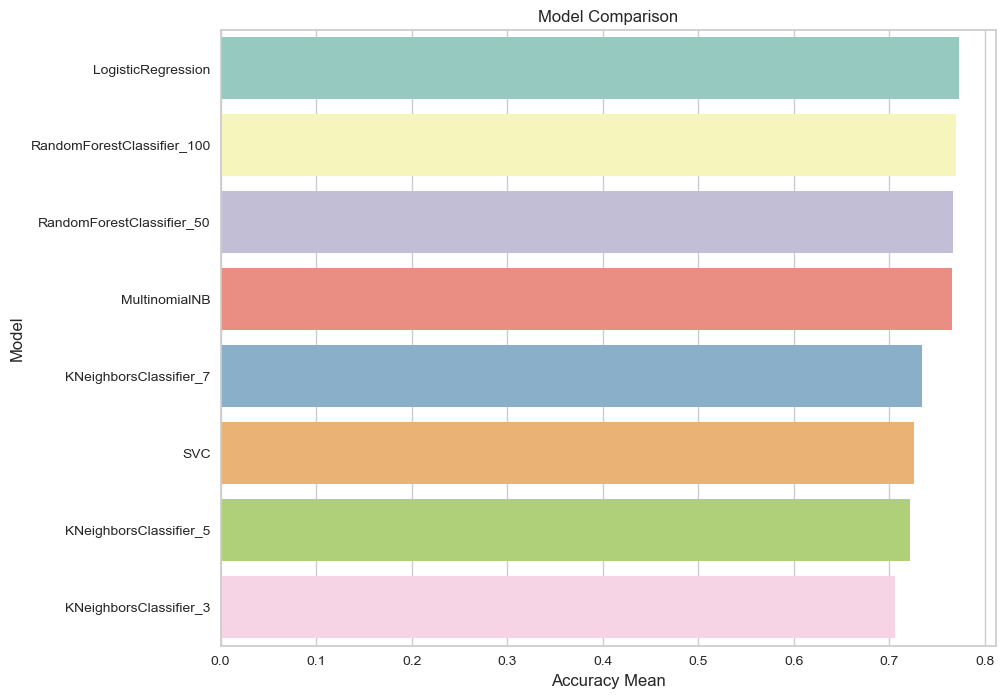

In [216]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Accuracy Mean', y='Model', data=results, palette='Set3')
plt.title('Model Comparison')

###
- Như vậy, ta có thể sơ bộ thấy mô hình logistic Reg cho kết quả tốt hơn các mô hình còn lại

### Classification Report

### 
- Đối với bài toán phân loại này, chúng ta cần quan tâm tới high Recall rating not_like.
- với high Recall cao, thì các True rating not-like phải cao, còn các False-not_like dự báo có thể cao hoặc thấp. 

### 
- Như vậy ta chon Logistic Regression cho việc tinh chỉnh mô hình tối ưu

### Logistic Regression

#### Hyperparameter tuning

In [217]:
# Use GridSearchCV to find the best parameters for the models
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# Create a list of parameters of Logistic Regression for the GridSearchCV
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
#param_grid = {
    #'n_estimators': [100,300, 500, 1000],
    #'learning_rate':[0.001,0.01,0.1, 1]
#}
# Create a list of models to test
clf_grid = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,cv=5, scoring='accuracy', error_score=0)
search_clf = clf_grid.fit(X_train, y_train)
best_clf = search_clf.best_estimator_

##Score
#cross_clf = cross_val_score(best_clf, X_test, y_test, scoring='accuracy', cv=5, n_jobs=-1)

In [218]:
print('Best params:', search_clf.best_params_)

Best params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


### Best Params

In [219]:
## Create the best model
best_model = LogisticRegression(C= 10,penalty='l2',solver= 'lbfgs')
# Fit the best model to the training data
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

### Metrics to Report

In [220]:
# Get the accuracy score for the best model
accuracy_train = round(best_model.score(X_train, y_train) * 100, 3)
accuracy_test = round(best_model.score(X_test, y_test) * 100, 3)
print('Accuracy score for the best model on the training data: ', accuracy_train)
print('Accuracy score for the best model on the test data: ', accuracy_test)

Accuracy score for the best model on the training data:  77.35
Accuracy score for the best model on the test data:  77.893


              precision    recall  f1-score   support

    negative       0.55      0.35      0.43      1503
     neutral       0.27      0.01      0.02      1157
    positive       0.80      0.97      0.88      8020

    accuracy                           0.78     10680
   macro avg       0.54      0.44      0.44     10680
weighted avg       0.71      0.78      0.72     10680



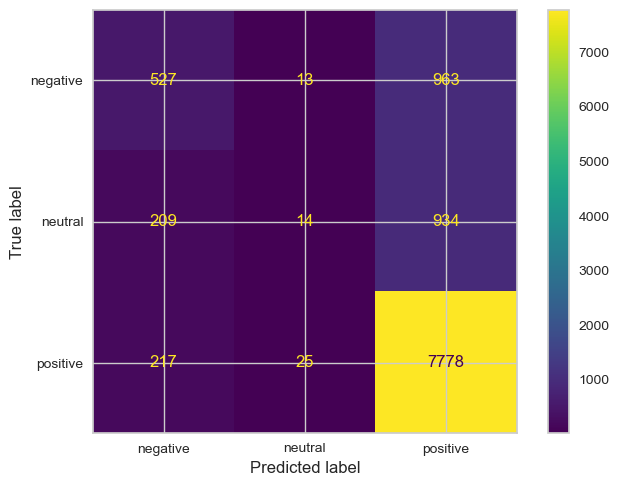

In [221]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

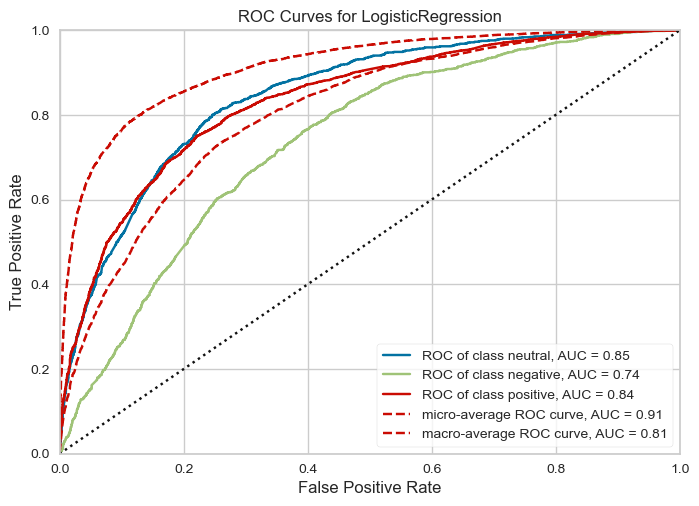

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [222]:
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, roc_auc
visualizer = ROCAUC(best_model, classes=y.unique())

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

## Naive Bayes

In [223]:
# Use GridSearchCV to find the best parameters for the models
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# Create a list of parameters of Naive Bayes for the GridSearchCV
# define models and parameters
model2 = MultinomialNB()
alpha = [0.1, 0.5, 1.0, 10.0]
fit_prior = [True, False]

grid2 = dict(alpha=alpha, fit_prior=fit_prior)
#param_grid = {
    #'n_estimators': [100,300, 500, 1000],
    #'learning_rate':[0.001,0.01,0.1, 1]
#}
# Create a list of models to test
clf_grid2 = GridSearchCV(estimator=model2, param_grid=grid2, n_jobs=-1,cv=5, scoring='accuracy', error_score=0)
search_clf2 = clf_grid2.fit(X_train, y_train)
best_clf2 = search_clf2.best_estimator_  
##Score
#cross_clf = cross_val_score(best_clf, X_test, y_test, scoring='accuracy', cv=5, n_jobs=-1)

In [224]:
print('Best params:', search_clf2.best_params_)

Best params: {'alpha': 0.1, 'fit_prior': True}


In [225]:
#create best model
best_model2 = MultinomialNB(alpha=0.1, fit_prior=True)
# Fit the best model to the training data
best_model2.fit(X_train, y_train)
y_pred2 = best_model2.predict(X_test)

In [226]:
# Get the accuracy score for the best model
accuracy_train2 = round(best_model2.score(X_train, y_train) * 100, 3)
accuracy_test2 = round(best_model2.score(X_test, y_test) * 100, 3)
print('Accuracy score for the best model on the training data: ', accuracy_train2)
print('Accuracy score for the best model on the test data: ', accuracy_test2)

Accuracy score for the best model on the training data:  76.647
Accuracy score for the best model on the test data:  77.238


              precision    recall  f1-score   support

    negative       0.66      0.20      0.30      1503
     neutral       0.00      0.00      0.00      1157
    positive       0.78      0.99      0.87      8020

    accuracy                           0.77     10680
   macro avg       0.48      0.40      0.39     10680
weighted avg       0.68      0.77      0.70     10680



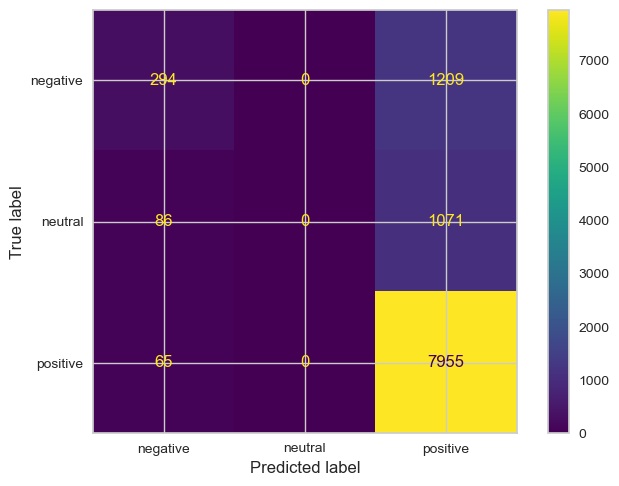

In [227]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred2))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred2)

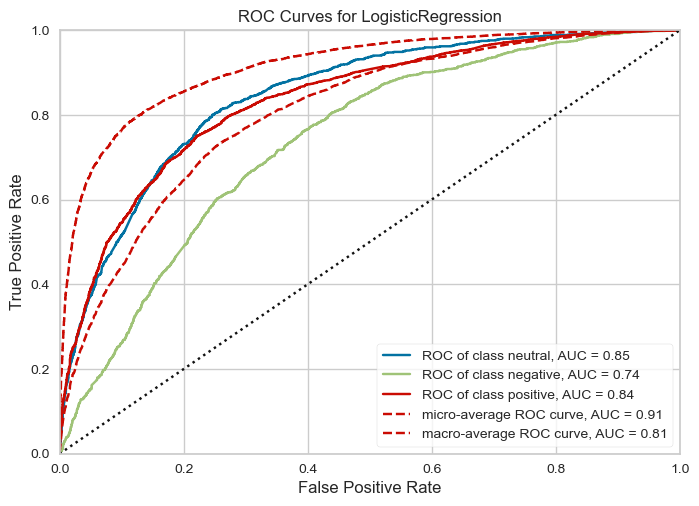

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [297]:
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, roc_auc
visualizer = ROCAUC(best_model, classes=y.unique())

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

## ANALYSIS WITH 3 CLASSES (PYSPARK)

### PREPARE

In [228]:
import findspark
findspark.init()

In [229]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import length
from pyspark.ml.feature import Tokenizer, StopWordsRemover
from pyspark.ml.feature import CountVectorizer, IDF, StringIndexer
from pyspark.ml.classification import NaiveBayes, RandomForestClassifier, LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vector
from pyspark.ml import Pipeline
from pyspark.sql.functions import lit
from bs4 import BeautifulSoup
from pyspark import keyword_only
import pyspark.sql.functions as F
from pyspark.mllib.evaluation import MulticlassMetrics
from datetime import datetime
from pyspark.ml import Transformer
from pyspark.sql.types import FloatType
from pyspark.ml.param.shared import HasInputCol, HasOutputCol 
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType 
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
import numpy as np

SPARK

In [230]:
spark = SparkSession.builder.appName('Rating').getOrCreate()

### LOAD AND SHOW INFORMATION ABOUT DATA

In [231]:
df1 = spark.read.csv("comments_final2.csv", header=True, inferSchema=True)

In [232]:
df1.count()

36932

In [233]:
df1.printSchema()

root
 |-- Column1: integer (nullable = true)
 |-- processed_text: string (nullable = true)
 |-- class: string (nullable = true)
 |-- word_count: integer (nullable = true)



In [234]:
df1.groupby('class').count().show()

+--------+-----+
|   class|count|
+--------+-----+
|positive|27643|
| neutral| 4010|
|negative| 5279|
+--------+-----+



### CHECK DATA

In [235]:
df1 = df1.withColumn('length', length(df1['processed_text']))

In [236]:
df1.show(5)

+-------+-------------------+--------+----------+------+
|Column1|     processed_text|   class|word_count|length|
+-------+-------------------+--------+----------+------+
|    601|sách không_đối thần| neutral|         3|    19|
|   3070| tuyệt_đối lượm lỗi|negative|         3|    18|
|   3370|       chữ đọc dịch|negative|         3|    12|
|   3784| quá_thất vọng hàng|negative|         3|    18|
|   3881|     bì bị_nhăn góc| neutral|         3|    14|
+-------+-------------------+--------+----------+------+
only showing top 5 rows



In [237]:
df1.groupBy('class').mean().show()

+--------+------------------+------------------+------------------+
|   class|      avg(Column1)|   avg(word_count)|       avg(length)|
+--------+------------------+------------------+------------------+
|positive| 39626.48019390081| 17.43736208081612|109.52154252432804|
| neutral|40753.994264339155|13.203241895261845| 80.59052369077307|
|negative| 40189.49952642546|13.819473385110816|  83.8029929910968|
+--------+------------------+------------------+------------------+



In [238]:
data = df1.select('processed_text','class','length')

In [239]:
data.show()

+--------------------+--------+------+
|      processed_text|   class|length|
+--------------------+--------+------+
| sách không_đối thần| neutral|    19|
|  tuyệt_đối lượm lỗi|negative|    18|
|        chữ đọc dịch|negative|    12|
|  quá_thất vọng hàng|negative|    18|
|      bì bị_nhăn góc| neutral|    14|
|       đường ướt mưa| neutral|    13|
| bị_lặp cẩu_thả khâu|negative|    19|
|    tâm chán quá_mặc|negative|    16|
|    sách hơi_quăn ổn| neutral|    16|
|  sách lỗi không_đẹp| neutral|    18|
|      đọc bị_mấy vết| neutral|    14|
|       sách bọc lông| neutral|    13|
|không_hiểu bị_lỗi...|negative|    22|
|   sách bị_dẹp bị_dơ| neutral|    17|
|      sách đọc trắng|negative|    14|
|     gói hàng làm_ăn|negative|    15|
|   hàng quá_buồn săn|negative|    17|
|     bị_mốp bìa cười| neutral|    15|
|   căng rất_thư giãn|negative|    17|
|sản_phẩm rất_tệ t...|negative|    21|
+--------------------+--------+------+
only showing top 20 rows



In [240]:
data = data.filter(data['processed_text'].isNotNull())

#### FEATURES AND TRANSFORM

In [241]:
class BsTextExtractor(Transformer, HasInputCol, HasOutputCol):
    
    @keyword_only
    def __init__(self, inputCol=None, outputCol=None):
        super(BsTextExtractor, self).__init__() 
        kwargs = self._input_kwargs 
        self.setParams(**kwargs)
        
    @keyword_only
    def setParams(self, inputCol=None, outputCol=None): 
        kwargs = self._input_kwargs
        return self._set(**kwargs)
    def _transform(self, dataset):
        def f(s):
            cleaned_text = BeautifulSoup(s).text 
            return cleaned_text
        t = StringType()
        out_col = self.getOutputCol()
        in_col = dataset[self.getInputCol()]
        return dataset.withColumn(out_col, udf(f, t)(in_col))

In [242]:
text_extractor = BsTextExtractor(inputCol="processed_text", outputCol="cleaned_text")
tokenizer = Tokenizer(inputCol='cleaned_text', outputCol='token_text')
stopremove= StopWordsRemover(inputCol='token_text', outputCol='stop_tokens')
count_vec = CountVectorizer(inputCol='stop_tokens', outputCol='c_vec')
idf = IDF(inputCol='c_vec', outputCol='tf_idf')
ham_spam_to_num = StringIndexer(inputCol='class',outputCol='label', handleInvalid='keep')

In [243]:
clean_up = VectorAssembler(inputCols =['tf_idf','length'],
                           outputCol='features')

In [244]:
data_prep_pipe = Pipeline(stages=[ham_spam_to_num,
                                  text_extractor,
                                  tokenizer,
                                  stopremove,
                                  count_vec,
                                  idf,
                                  clean_up])

In [245]:
cleaner = data_prep_pipe.fit(data)

In [246]:
clean_data = cleaner.transform(data)

In [247]:
clean_data = clean_data.select('label','features')

In [248]:
clean_data.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  2.0|(23418,[0,178,569...|
|  1.0|(23418,[49,2521,4...|
|  1.0|(23418,[1,25,35,2...|
|  1.0|(23418,[2,32,610,...|
|  2.0|(23418,[19,341,38...|
|  2.0|(23418,[127,339,5...|
|  1.0|(23418,[115,717,1...|
|  1.0|(23418,[109,172,1...|
|  2.0|(23418,[0,40,2751...|
|  2.0|(23418,[0,49,1123...|
|  2.0|(23418,[1,142,345...|
|  2.0|(23418,[0,6,912,2...|
|  1.0|(23418,[182,307,1...|
|  2.0|(23418,[0,585,200...|
|  1.0|(23418,[0,1,312,2...|
|  1.0|(23418,[2,13,391,...|
|  1.0|(23418,[2,363,446...|
|  2.0|(23418,[5,56,4664...|
|  1.0|(23418,[1235,2343...|
|  1.0|(23418,[26,107,11...|
+-----+--------------------+
only showing top 20 rows



In [249]:
clean_data.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|  0.0|27643|
|  1.0| 5279|
|  2.0| 4010|
+-----+-----+



In [250]:
(train, test) = clean_data.randomSplit([0.7,0.3])

### BUILD MODEL

#### Naive Bayes

In [251]:
nb = NaiveBayes()
prediction = nb.fit(train)
test_results = prediction.transform(test)
start_time = datetime.now()
train_time = datetime.now() - start_time  
test_results.show()
print(train_time)

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|  0.0|(23418,[0,1,2,3,4...|[-636.90868347844...|[0.99999999847493...|       0.0|
|  0.0|(23418,[0,1,2,3,4...|[-729.52050398366...|[1.0,8.0315246763...|       0.0|
|  0.0|(23418,[0,1,2,3,4...|[-542.10862625982...|[9.95676200216549...|       1.0|
|  0.0|(23418,[0,1,2,3,4...|[-765.69832499136...|[1.30722716056695...|       2.0|
|  0.0|(23418,[0,1,2,3,4...|[-404.76403207828...|[0.99999999998795...|       0.0|
|  0.0|(23418,[0,1,2,3,4...|[-119.29925692761...|[0.83819980202124...|       0.0|
|  0.0|(23418,[0,1,2,3,4...|[-970.94448884266...|[0.06160546244212...|       2.0|
|  0.0|(23418,[0,1,2,3,4...|[-146.50804157989...|[0.99525230181339...|       0.0|
|  0.0|(23418,[0,1,2,3,4...|[-728.17547758063...|[1.0,6.0854204243...|       0.0|
|  0.0|(23418,[0

In [252]:
test_results.groupBy('label', 'prediction').count().show()

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  2.0|       0.0|  289|
|  1.0|       1.0| 1101|
|  0.0|       1.0|  743|
|  1.0|       0.0|  162|
|  2.0|       2.0|  427|
|  2.0|       1.0|  458|
|  1.0|       2.0|  339|
|  0.0|       0.0| 6364|
|  0.0|       2.0| 1163|
+-----+----------+-----+



#### Report

In [253]:
#important: need to cast to float type, and order by prediction, else it won't work
preds_and_labels = test_results.select(['prediction','label']).withColumn('label', F.col('label').cast(FloatType())).orderBy('prediction')
#select only prediction and label columns
preds_and_labels = preds_and_labels.select(['prediction','label'])
metrics = MulticlassMetrics(preds_and_labels.rdd.map(tuple))
print(metrics.confusionMatrix().toArray())

[[6364.  743. 1163.]
 [ 162. 1101.  339.]
 [ 289.  458.  427.]]


              precision    recall  f1-score   support

         0.0       0.93      0.77      0.84      8270
         1.0       0.48      0.69      0.56      1602
         2.0       0.22      0.36      0.28      1174

    accuracy                           0.71     11046
   macro avg       0.54      0.61      0.56     11046
weighted avg       0.79      0.71      0.74     11046



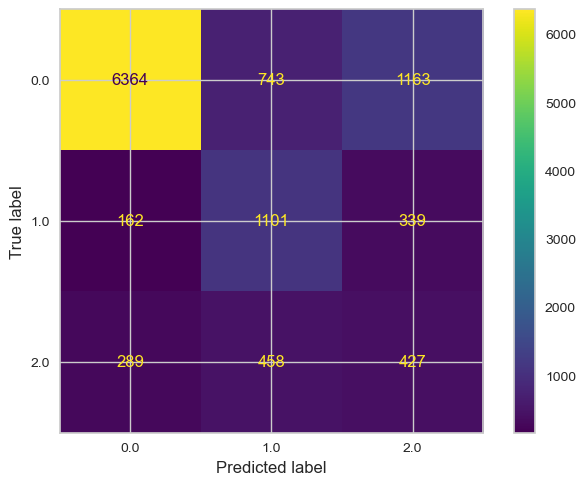

In [254]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(preds_and_labels.toPandas()['label'], preds_and_labels.toPandas()['prediction']))
ConfusionMatrixDisplay.from_predictions(preds_and_labels.toPandas()['label'], preds_and_labels.toPandas()['prediction'])

In [255]:
acc_eva_nb = MulticlassClassificationEvaluator()
acc_nb = acc_eva_nb.evaluate(test_results)
print('Accuracy of model: {}'.format(acc_nb))

Accuracy of model: 0.7427595603962776


#### Logistic Regression

In [256]:
lg = LogisticRegression(maxIter=10, regParam=0.3)
pre_lg = lg.fit(train)
result_lg = pre_lg.transform(test)
start_time = datetime.now()
train_time = datetime.now() - start_time  
print(train_time)
result_lg.groupBy('label', 'prediction').count().show()

0:00:00
+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  2.0|       0.0| 1035|
|  1.0|       1.0|  497|
|  0.0|       1.0|   68|
|  1.0|       0.0| 1069|
|  2.0|       2.0|   41|
|  2.0|       1.0|   98|
|  1.0|       2.0|   36|
|  0.0|       0.0| 8170|
|  0.0|       2.0|   32|
+-----+----------+-----+



#### Report

In [257]:
#important: need to cast to float type, and order by prediction, else it won't work
preds_and_labels_lg = result_lg.select(['prediction','label']).withColumn('label', F.col('label').cast(FloatType())).orderBy('prediction')
#select only prediction and label columns
preds_and_labels_lg = preds_and_labels_lg.select(['prediction','label'])
metrics_lg = MulticlassMetrics(preds_and_labels_lg.rdd.map(tuple))
print(metrics_lg.confusionMatrix().toArray())

[[8170.   68.   32.]
 [1069.  497.   36.]
 [1035.   98.   41.]]


              precision    recall  f1-score   support

         0.0       0.80      0.99      0.88      8270
         1.0       0.75      0.31      0.44      1602
         2.0       0.38      0.03      0.06      1174

    accuracy                           0.79     11046
   macro avg       0.64      0.44      0.46     11046
weighted avg       0.74      0.79      0.73     11046



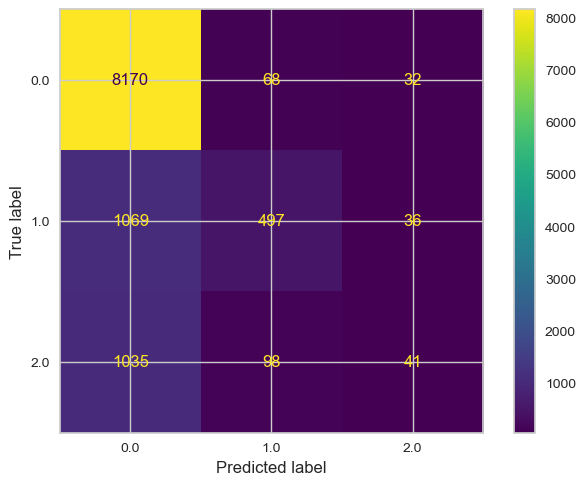

In [258]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(preds_and_labels_lg.toPandas()['label'], preds_and_labels_lg.toPandas()['prediction']))
ConfusionMatrixDisplay.from_predictions(preds_and_labels_lg.toPandas()['label'], preds_and_labels_lg.toPandas()['prediction'])

In [259]:
acc_eva_lg = MulticlassClassificationEvaluator()
acc_lg = acc_eva_lg.evaluate(result_lg)
print('Accuracy of model: {}'.format(acc_lg))

Accuracy of model: 0.7301434672040401


#### Nhận xét:
- đối với việc sử dụng Pyspark, thời gian xử lý nhanh hơn
- Model Naive bayes cũng cho kết quả tốt hơn so với sử dụng ML thông thường cho bài toán.

## ANALYSIS WITH 2 CLASSES (PYSPARK)

### PREPARE

In [260]:
import findspark
findspark.init()

In [261]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import length
from pyspark.ml.feature import Tokenizer, StopWordsRemover
from pyspark.ml.feature import CountVectorizer, IDF, StringIndexer
from pyspark.ml.classification import NaiveBayes, RandomForestClassifier, LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vector
from pyspark.ml import Pipeline
from pyspark.sql.functions import lit
from bs4 import BeautifulSoup
from pyspark import keyword_only
from pyspark.ml import Transformer
from pyspark.sql.functions import when
import pyspark.sql.functions as F
from pyspark.mllib.evaluation import MulticlassMetrics, BinaryClassificationMetrics
from datetime import datetime
from pyspark.ml import Transformer
from pyspark.sql.types import FloatType
from pyspark.ml.param.shared import HasInputCol, HasOutputCol 
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

SPARK

In [262]:
spark = SparkSession.builder.appName('Rating').getOrCreate()

#### LOAD AND SHOW INFORMATION ABOUT DATA

In [263]:
df1 = spark.read.csv("comments_final2.csv", header=True, inferSchema=True)

In [264]:
df1.printSchema()

root
 |-- Column1: integer (nullable = true)
 |-- processed_text: string (nullable = true)
 |-- class: string (nullable = true)
 |-- word_count: integer (nullable = true)



In [265]:
df2 = df1.withColumn("class", when(df1['class'] == "negative","negative") \
      .when(df1['class'] == "neutral","negative") \
      .otherwise(df1['class']))
df2.show()

+-------+--------------------+--------+----------+
|Column1|      processed_text|   class|word_count|
+-------+--------------------+--------+----------+
|    601| sách không_đối thần|negative|         3|
|   3070|  tuyệt_đối lượm lỗi|negative|         3|
|   3370|        chữ đọc dịch|negative|         3|
|   3784|  quá_thất vọng hàng|negative|         3|
|   3881|      bì bị_nhăn góc|negative|         3|
|   4022|       đường ướt mưa|negative|         3|
|   4393| bị_lặp cẩu_thả khâu|negative|         3|
|   4755|    tâm chán quá_mặc|negative|         3|
|   5030|    sách hơi_quăn ổn|negative|         3|
|   5419|  sách lỗi không_đẹp|negative|         3|
|   5425|      đọc bị_mấy vết|negative|         3|
|   5966|       sách bọc lông|negative|         3|
|   6100|không_hiểu bị_lỗi...|negative|         3|
|   7297|   sách bị_dẹp bị_dơ|negative|         3|
|   7427|      sách đọc trắng|negative|         3|
|   7815|     gói hàng làm_ăn|negative|         3|
|   8137|   hàng quá_buồn săn|n

In [266]:
df2.count()

36932

In [267]:
df2.groupby('class').count().show()

+--------+-----+
|   class|count|
+--------+-----+
|positive|27643|
|negative| 9289|
+--------+-----+



#### CHECK DATA

In [268]:
df2 = df2.withColumn('length', length(df2['processed_text']))

In [269]:
df2.show(5)

+-------+-------------------+--------+----------+------+
|Column1|     processed_text|   class|word_count|length|
+-------+-------------------+--------+----------+------+
|    601|sách không_đối thần|negative|         3|    19|
|   3070| tuyệt_đối lượm lỗi|negative|         3|    18|
|   3370|       chữ đọc dịch|negative|         3|    12|
|   3784| quá_thất vọng hàng|negative|         3|    18|
|   3881|     bì bị_nhăn góc|negative|         3|    14|
+-------+-------------------+--------+----------+------+
only showing top 5 rows



In [270]:
df2.groupBy('class').mean().show()

+--------+-----------------+------------------+------------------+
|   class|     avg(Column1)|   avg(word_count)|       avg(length)|
+--------+-----------------+------------------+------------------+
|positive|39626.48019390081| 17.43736208081612|109.52154252432804|
|negative|40433.18817956723|13.553450317579934| 82.41619119388524|
+--------+-----------------+------------------+------------------+



In [271]:
data = df2.select('processed_text','class','length')

In [272]:
data.show()

+--------------------+--------+------+
|      processed_text|   class|length|
+--------------------+--------+------+
| sách không_đối thần|negative|    19|
|  tuyệt_đối lượm lỗi|negative|    18|
|        chữ đọc dịch|negative|    12|
|  quá_thất vọng hàng|negative|    18|
|      bì bị_nhăn góc|negative|    14|
|       đường ướt mưa|negative|    13|
| bị_lặp cẩu_thả khâu|negative|    19|
|    tâm chán quá_mặc|negative|    16|
|    sách hơi_quăn ổn|negative|    16|
|  sách lỗi không_đẹp|negative|    18|
|      đọc bị_mấy vết|negative|    14|
|       sách bọc lông|negative|    13|
|không_hiểu bị_lỗi...|negative|    22|
|   sách bị_dẹp bị_dơ|negative|    17|
|      sách đọc trắng|negative|    14|
|     gói hàng làm_ăn|negative|    15|
|   hàng quá_buồn săn|negative|    17|
|     bị_mốp bìa cười|negative|    15|
|   căng rất_thư giãn|negative|    17|
|sản_phẩm rất_tệ t...|negative|    21|
+--------------------+--------+------+
only showing top 20 rows



#### RESAMPLING

In [273]:
from pyspark.sql.functions import col, explode, array, lit
major_df = data.filter(col("class") == 'positive')
minor_df = data.filter(col("class") == 'negative')
ratio = int(major_df.count()/minor_df.count())
print("ratio: {}".format(ratio))


ratio: 2


In [274]:
sampled_majority_df = major_df.sample(False, 1/ratio)
combined_df_2 = sampled_majority_df.unionAll(minor_df)
combined_df_2.show()

+--------------------+--------+------+
|      processed_text|   class|length|
+--------------------+--------+------+
|sách đẹp chất_lượ...|positive|    24|
|    giấy đẹp dày trẻ|positive|    16|
|sách đọc không_bà...|positive|    22|
|cực_kì chất_lượng...|positive|    29|
|sản_phẩm hàng hài...|positive|    29|
|nội hấp_dẫn dịch_...|positive|    24|
| sách đẹp bọc rất_kĩ|positive|    19|
|hàng đóng_gói bìa...|positive|    21|
|hàng chất_lượng s...|positive|    24|
|bọc sách rất_tốt ...|positive|    21|
|sách tốt chất_lượ...|positive|    24|
|     gáy sách rơi tờ|positive|    15|
| sách bọc rất_thú vị|positive|    19|
|  sách hơi_sớm bé bé|positive|    18|
|   sách đẹp nội hàng|positive|    17|
|sách câu_chuyện g...|positive|    25|
|đóng gói sản_phẩm...|positive|    22|
|sách rất_okthích ...|positive|    28|
|sách bản_chính ch...|positive|    22|
|sách đẹp rất_đầy ...|positive|    26|
+--------------------+--------+------+
only showing top 20 rows



In [275]:
combined_df_2.groupby('class').count().show()

+--------+-----+
|   class|count|
+--------+-----+
|positive|13892|
|negative| 9289|
+--------+-----+



#### FEATURES AND TRANSFORM

In [276]:
class BsTextExtractor(Transformer, HasInputCol, HasOutputCol):
    
    @keyword_only
    def __init__(self, inputCol=None, outputCol=None):
        super(BsTextExtractor, self).__init__() 
        kwargs = self._input_kwargs 
        self.setParams(**kwargs)
        
    @keyword_only
    def setParams(self, inputCol=None, outputCol=None): 
        kwargs = self._input_kwargs
        return self._set(**kwargs)
    def _transform(self, dataset):
        def f(s):
            cleaned_text = BeautifulSoup(s).text 
            return cleaned_text
        t = StringType()
        out_col = self.getOutputCol()
        in_col = dataset[self.getInputCol()]
        return dataset.withColumn(out_col, udf(f, t)(in_col))

In [277]:
text_extractor = BsTextExtractor(inputCol="processed_text", outputCol="cleaned_text")
tokenizer = Tokenizer(inputCol='cleaned_text', outputCol='token_text')
stopremove= StopWordsRemover(inputCol='token_text', outputCol='stop_tokens')
count_vec = CountVectorizer(inputCol='stop_tokens', outputCol='c_vec')
idf = IDF(inputCol='c_vec', outputCol='tf_idf')
ham_spam_to_num = StringIndexer(inputCol='class',outputCol='label', handleInvalid='keep')

In [278]:
clean_up = VectorAssembler(inputCols =['tf_idf','length'],
                           outputCol='features')

In [279]:
data_prep_pipe = Pipeline(stages=[ham_spam_to_num,
                                  text_extractor,
                                  tokenizer,
                                  stopremove,
                                  count_vec,
                                  idf,
                                  clean_up])

In [280]:
cleaner = data_prep_pipe.fit(combined_df_2)

In [281]:
clean_data = cleaner.transform(combined_df_2)

In [282]:
clean_data = clean_data.select('label','features')

In [283]:
clean_data.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(18260,[0,4,7,9,1...|
|  0.0|(18260,[4,7,53,87...|
|  0.0|(18260,[0,1,3,618...|
|  0.0|(18260,[9,26,143,...|
|  0.0|(18260,[2,23,94,1...|
|  0.0|(18260,[2,3,89,15...|
|  0.0|(18260,[0,4,6,856...|
|  0.0|(18260,[2,4,5,8,1...|
|  0.0|(18260,[0,2,9,11,...|
|  0.0|(18260,[0,6,210,1...|
|  0.0|(18260,[0,2,9,11,...|
|  0.0|(18260,[0,49,599,...|
|  0.0|(18260,[0,6,606,7...|
|  0.0|(18260,[0,62,1024...|
|  0.0|(18260,[0,2,3,4,1...|
|  0.0|(18260,[0,2,30,75...|
|  0.0|(18260,[13,18,23,...|
|  0.0|(18260,[0,15,1183...|
|  0.0|(18260,[0,35,137,...|
|  0.0|(18260,[0,4,37,28...|
+-----+--------------------+
only showing top 20 rows



In [284]:
clean_data.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|  0.0|13892|
|  1.0| 9289|
+-----+-----+



In [285]:
(train, test) = clean_data.randomSplit([0.7,0.3])

### BUILD MODEL

#### Naive Bayes

In [286]:
nb = NaiveBayes()
prediction = nb.fit(train)
test_results = prediction.transform(test)
start_time = datetime.now()
train_time = datetime.now() - start_time  
test_results.show()
print(train_time)

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|  0.0|(18260,[0,1,2,3,4...|[-402.87834674608...|[1.0,8.5379448536...|       0.0|
|  0.0|(18260,[0,1,2,3,4...|[-680.70858512253...|[1.0,2.5411934803...|       0.0|
|  0.0|(18260,[0,1,2,3,4...|[-1215.4310959497...|[0.99999047886028...|       0.0|
|  0.0|(18260,[0,1,2,3,4...|[-694.93753664958...|[0.23003112870093...|       1.0|
|  0.0|(18260,[0,1,2,3,4...|[-827.24141638713...|[1.0,1.3970913908...|       0.0|
|  0.0|(18260,[0,1,2,3,4...|[-492.86456322886...|[0.99997967655697...|       0.0|
|  0.0|(18260,[0,1,2,3,4...|[-387.74380446978...|[0.99999131447641...|       0.0|
|  0.0|(18260,[0,1,2,3,4...|[-499.35197371246...|[2.15252794503593...|       1.0|
|  0.0|(18260,[0,1,2,3,4...|[-661.53968407629...|[1.0,7.7251998495...|       0.0|
|  0.0|(18260,[0

In [287]:
test_results.groupBy('label', 'prediction').count().show()

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  0.0|       1.0|  924|
|  0.0|       0.0| 3198|
|  1.0|       1.0| 2302|
|  1.0|       0.0|  509|
+-----+----------+-----+



#### Report

In [288]:
#important: need to cast to float type, and order by prediction, else it won't work
preds_and_labels = test_results.select(['prediction','label']).withColumn('label', F.col('label').cast(FloatType())).orderBy('prediction')

#select only prediction and label columns
preds_and_labels = preds_and_labels.select(['prediction','label'])

metrics = MulticlassMetrics(preds_and_labels.rdd.map(tuple))
print(metrics.confusionMatrix().toArray())

[[3198.  924.]
 [ 509. 2302.]]


              precision    recall  f1-score   support

         0.0       0.86      0.78      0.82      4122
         1.0       0.71      0.82      0.76      2811

    accuracy                           0.79      6933
   macro avg       0.79      0.80      0.79      6933
weighted avg       0.80      0.79      0.79      6933



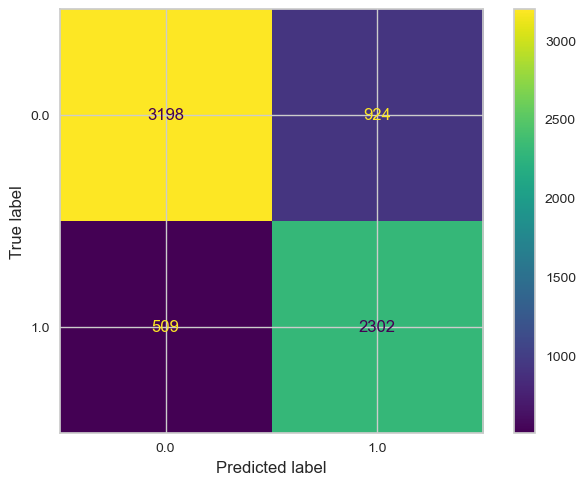

In [289]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(preds_and_labels.toPandas()['label'], preds_and_labels.toPandas()['prediction']))
ConfusionMatrixDisplay.from_predictions(preds_and_labels.toPandas()['label'], preds_and_labels.toPandas()['prediction'])

In [290]:
acc_eva = MulticlassClassificationEvaluator()
acc = acc_eva.evaluate(test_results)
print('Accuracy of model: {}'.format(acc))

Accuracy of model: 0.7949334944269597


#### Logistic Regression

In [291]:
lg = LogisticRegression(maxIter=10, regParam=0.3)
pre_lg = lg.fit(train)
result_lg = pre_lg.transform(test)
start_time = datetime.now()
train_time = datetime.now() - start_time 
print(train_time)

0:00:00


In [292]:
result_lg.groupBy('label', 'prediction').count().show()

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  0.0|       1.0|  340|
|  0.0|       0.0| 3782|
|  1.0|       1.0| 1958|
|  1.0|       0.0|  853|
+-----+----------+-----+



#### Report

In [293]:
#important: need to cast to float type, and order by prediction, else it won't work
preds_and_labels_lg = result_lg.select(['prediction','label']).withColumn('label', F.col('label').cast(FloatType())).orderBy('prediction')

#select only prediction and label columns
preds_and_labels_lg = preds_and_labels_lg.select(['prediction','label'])

metrics_lg = MulticlassMetrics(preds_and_labels_lg.rdd.map(tuple))
print(metrics_lg.confusionMatrix().toArray())

[[3782.  340.]
 [ 853. 1958.]]


              precision    recall  f1-score   support

         0.0       0.82      0.92      0.86      4122
         1.0       0.85      0.70      0.77      2811

    accuracy                           0.83      6933
   macro avg       0.83      0.81      0.82      6933
weighted avg       0.83      0.83      0.82      6933



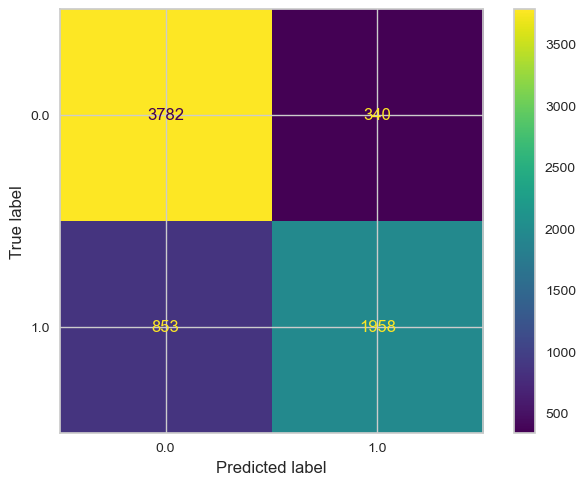

In [294]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(preds_and_labels_lg.toPandas()['label'], preds_and_labels_lg.toPandas()['prediction']))
ConfusionMatrixDisplay.from_predictions(preds_and_labels_lg.toPandas()['label'], preds_and_labels_lg.toPandas()['prediction'])

In [295]:
acc_eva_lg = MulticlassClassificationEvaluator()
acc_lg = acc_eva_lg.evaluate(result_lg)
print('Accuracy of model: {}'.format(acc_lg))

Accuracy of model: 0.8243255160391324


Nhận xét: sử dụng Pyspark vừa giảm được thời gian chạy cho mô hình, vừa tăng được độ chính xác.